# Setup Pipeline -  (build model and load weights)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle, json
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
import mrcnn.visualize_2 as vis2
from mrcnn.prep_notebook import build_fcn_inference_pipeline_newshapes, build_mrcnn_inference_pipeline_newshapes,run_mrcnn_detection
from mrcnn.visualize     import display_training_batch
from mrcnn.prep_notebook import get_inference_batch, get_image_batch, run_mrcnn_detection, run_fcn_detection
from mrcnn.newshapes     import prep_newshape_dataset
# from mrcnn.datagen       import data_generator, load_image_gt

##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --dataset       newshapes2"
input_parms +=" --mrcnn_logs_dir train_mrcnn "
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE "
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8L2 " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor   1"

args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)

Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path


Using TensorFlow backend.


 Init Image Class - Possible Object Choices:  {'airplane': 3, 'building': 3, 'tree': 5, 'cloud': 3, 'sun': 1, 'person': 5, 'car': 3, 'truck': 3}
 Init Image Class - Custom Color Keys      :  ['tree', 'cloud', 'sun', 'person', 'sky', 'ground']
 Init Image Class - Object Priority List   :  ['building', 'tree', 'car']
 Init Image Class - BUILD_MAX_TRIES        :  7
 Init Image Class - PERSON_CAR_DISTANCE    :  10

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr              

In [ ]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline_newshapes(args = args,verbose = 1)

###  Print some information about the model 

In [4]:
fcn_model.config.display()


FCN Configuration Parameters:
-----------------------------
BACKBONE_SHAPES                [[32 32]
 [16 16]
 [ 8  8]
 [ 4  4]
 [ 2  2]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        64
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
DETECTION_PER_CLASS            64
DIR_DATASET                    /home/kbardool/MLDatasets
DIR_PRETRAINED                 /home/kbardool/PretrainedModels
DIR_TRAINING                   /home/kbardool/models_newshapes
EPOCHS_TO_RUN                  0
FCN_INPUT_SHAPE                [128 128]
GPU_COUNT                      1
HEATMAP_SCALE_FACTOR           1
IMAGES_PER_GPU                 1
IMAGE_BUFFER                   20
IMAGE_MAX_DIM                  128
IMAGE_MIN_DIM                  128
IMAGE_PADDING                  True
IMAGE_SHAPE                    [128 128   3]
LAST_EPOCH_RAN                 0
LEARNING_MOMENTUM 

### Load Weights 

In [ ]:
MRCNN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000' 
mrcnn_files   = ['initialization', 
               'mrcnn_0001.h5', 'mrcnn_0020.h5', 'mrcnn_0041.h5', 'mrcnn_0060.h5', 'mrcnn_0092.h5', 
               'mrcnn_0116.h5', 'mrcnn_0154.h5', 'mrcnn_0174.h5', 'mrcnn_0201.h5', 'mrcnn_0223.h5', 
               'mrcnn_0243.h5', 'mrcnn_0332.h5']

# DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000'
# files   = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#            'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#            'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#            'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#            'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE/fcn20190323T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
fcn_files= ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
            'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
            'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
            'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
            'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
            'fcn_0077.h5', 'fcn_0089.h5', 'fcn_0170.h5', 'fcn_0177.h5',
            'fcn_0253.h5', 'fcn_0266.h5']

#### Load mrcnn weight file

In [ ]:
FILE_IDX = 
weights_path = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[FILE_IDX])
print("Loading weights ", weights_path)
mrcnn_model.load_model_weights(weights_path)

#### Load fcn weight file

In [6]:
FILE_IDX = -1
weights_path = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0089.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0089.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0089.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0089.h5 
FCN  MODEL Load weight file COMPLETE 


# Load / Build test datasets

In [ ]:
# del dataset_train, dataset_val, train_generator, val_generator
# dataset_test , test_generator   = prep_newshape_dataset( mrcnn_model.config,  1000, generator=True)
# with open('newshapes_dataset_1000_B.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
## -- OR --
## -- OR --
import pickle
with open(os.path.join(mrcnn_model.config.DIR_DATASET,"newshapes2_test_dataset_1000_A.pkl"), 'rb') as infile:
    dataset_test = pickle.load(infile)
print(type(dataset_test))    
class_names = dataset_test.class_names

dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

###  Display some images from dataset

In [ ]:
image_list = list(range(35))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

# Run MRCNN Detection pipeline on images

##  Run MRCNN detection pipeline on first image

### Load an image using `get_inference_batch()`

Processing 1 images
image                    shape: (128, 128, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  145.10001
image_metas              shape: (1, 17)               min:    0.00000  max:  128.00000
image id :  10
 Image_id    :  10  Reference:  [('sun', (255.0, 255.0, 0.0), (94, 7, 4, 4)), ('airplane', (212.0, 104.0, 242.0), (68, 23, 18, 7)), ('airplane', (38.0, 251.0, 220.0), (104, 30, 18, 7)), ('airplane', (3.0, 100.0, 249.0), (63, 32, 21, 8)), ('person', (240.0, 230.0, 140.0), (48, 90, 1, 10)), ('truck', (79.0, 235.0, 229.0), (110, 98, 44, 11)), ('tree', (0.0, 128.0, 0.0), (111, 85, 11, 26))] Coco Id: 10
 Image meta  :  [ 10 128 128   3   0   0 128 128]
 Class ids   :  (7,)    [3 7 7 7 1 8 5]
 Class Names :  ['sun', 'airplane', 'airplane', 'airplane', 'person', 'truck', 'tree']


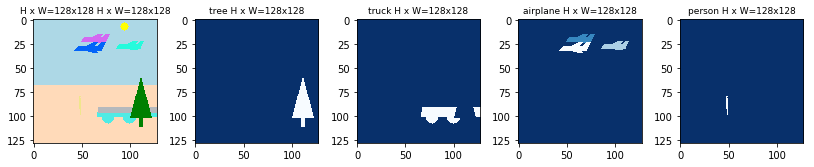

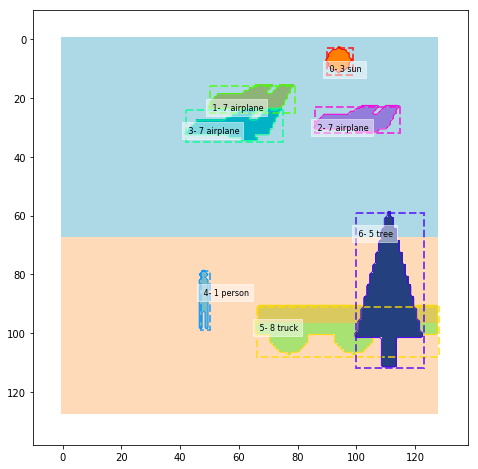

In [11]:
test_batch = get_inference_batch(dataset_test,mrcnn_model.config, image_ids=[10], display=True)
# image = get_image_batch(dataset_test, 10, display=True)

In [12]:
results = run_mrcnn_detection(mrcnn_model,dataset_test, image_ids=[33], verbose = 1)

Image Id  : 33     External Id: newshapes2.33     Image Reference: [('cloud', (220.0, 220.0, 220.0), (18, 12, 27, 5)), ('cloud', (192.0, 192.0, 192.0), (86, 12, 16, 5)), ('cloud', (245.0, 245.0, 245.0), (103, 17, 29, 7)), ('airplane', (48.0, 188.0, 132.0), (69, 24, 16, 6)), ('airplane', (243.0, 228.0, 90.0), (20, 31, 18, 7)), ('truck', (240.0, 166.0, 22.0), (96, 76, 21, 7)), ('truck', (24.0, 201.0, 15.0), (91, 85, 25, 8)), ('person', (210.0, 105.0, 30.0), (42, 93, 1, 9)), ('person', (240.0, 230.0, 140.0), (66, 93, 1, 9)), ('tree', (0.0, 128.0, 0.0), (81, 84, 9, 20)), ('truck', (20.0, 153.0, 192.0), (65, 113, 51, 12))]
===>  mrcnn_model.detect()
Processing 1 images
image                    shape: (128, 128, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 128, 128, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 17)               min:    0.00000  max:  128.00000
===>  call mrcnn_model.predict()
===> return from  mrcnn_model.pre

###  Display Results

In [ ]:
np_format = {'float': lambda x: "%10.4f" % x,'int': lambda x: "%10d" % x}
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

#### Display MRCNN scores - 1st style

In [ ]:
lmt =15
r = results[0]
print('       classes :', r['class_ids'][:lmt])
# print('       classes :', r['pr_scores'][:lmt,4].astype(int))
names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in r['class_ids'][:lmt]])

print('               : ', names)
print('                ', r['detection_ind'][:lmt])
print('   orig scores :', r['scores'][:lmt])
# print('   orig scores :', r['pr_scores'][:lmt,5])
print('    nomralized :', r['pr_scores'][:lmt,8])

print('-'*185)
print('   pr_scrs[11] :', r['pr_scores'][:lmt,11])
# print(' fcn_scores[8] :', r['fcn_scores'][:lmt,11])
print()
print(' pr_scores[14] :', r['pr_scores'][:lmt,14])
# print('fcn_scores[13] :', r['fcn_scores'][:lmt,14])
print()
print(' pr_scores[20] :', r['pr_scores'][:lmt,20])
# print('fcn_scores[19] :', r['fcn_scores'][:lmt,20])

vis2.display_mrcnn_style1(r)

####  Display MRCNN scores - 2nd style

In [19]:
r = results[0]
for molded_bbox, cls, scr, pr_scr in zip(r['molded_rois'].astype(np.int), r['class_ids'],  r['scores'], r['pr_scores']):
    print('{} {:2d}  {:.<10s}  {:5.4f} {}  pr_bbox: {}'.format(molded_bbox, cls, dataset_test.class_names[cls], scr, pr_scr[[4,5,6,7,8]], pr_scr[[0,1,2,3]].astype(np.int) ))
    print('{:>86s} {}'.format(' mrcnn old scores : ',  pr_scr[[9,10,11]]))
    print('{:>86s} {}'.format(' mrcnn alt scores1 : ', pr_scr[[12,13,14,15,16,17]]))
    print('{:>86s} {}'.format(' mrcnn alt scores2 : ', pr_scr[[18,19,20,21,22,23]]))
    print()
#     print('{:>86s} {}'.format(' fcn old style scores:    ', fcn_scr[[9,10,11]]))
#     print('{:>86s} {}'.format(' fcn alt scores1:  ',fcn_scr[[12,13,14,15,16,17]]))
#     print('{:>86s} {}'.format(' fcn_scores2:  '    ,fcn_scr[[18,19,20,21,22,23]]))
    print()

[       101         22        123        108]  8  truck.....  0.9999 [    8.0000     0.9999     1.0000    64.0000     1.0000]  pr_bbox: [       101         22        123        108]
                                                                   mrcnn old scores :  [    0.9990  1892.0000     0.9990]
                                                                  mrcnn alt scores1 :  [   67.1375    98.0000     0.6851     1.0000     1.0000     1.0000]
                                                                  mrcnn alt scores2 :  [   67.1375    98.0000     0.6851     1.0000     1.0000     1.0000]


[        23          5         32         29]  7  airplane..  0.9982 [    7.0000     0.9982     1.0000    63.0000     1.0000]  pr_bbox: [        23          5         32         29]
                                                                   mrcnn old scores :  [    0.9623   216.0000     0.9623]
                                                                  mrcnn alt scor

#### Display MRCNN scores - 3rd style

In [21]:
# Originally r['pr_scores'] was not synchronized with r['class_ids'], r['molded_rois'], and r['scores']
# Used this code to sort r['pr_scores'] by score to synchronize it with the other arrays
#------------------------------------------------------------------------------------------------------
# print(r['pr_scores'][:,5])
# tt = np.argsort(r['pr_scores'][:,5])[::-1]   ##[:roi_count]
# print(tt)
# tt_arr = r['pr_scores'][tt]

In [20]:
for scr, pr_scr, cls in zip(r['scores'],  r['pr_scores'], r['class_ids']):
    print("cls: {:2d}  scr: {:7.5f}   | pr_cls: {:2.0f}  pr_scr: {:7.5f}  norm_scr: {:7.5f}   ALT Scr0: {:7.5f}  Alt1: {:7.5f}  Alt2: {:7.5f}".format(
        cls, scr, pr_scr[4], pr_scr[5], pr_scr[8], pr_scr[11], pr_scr[14], pr_scr[20]))    

cls:  8  scr: 0.99990   | pr_cls:  8  pr_scr: 0.99990  norm_scr: 1.00000   ALT Scr0: 0.99901  Alt1: 0.68508  Alt2: 0.68508
cls:  7  scr: 0.99821   | pr_cls:  7  pr_scr: 0.99821  norm_scr: 1.00000   ALT Scr0: 0.96226  Alt1: 0.68331  Alt2: 0.68331
cls:  5  scr: 0.99751   | pr_cls:  5  pr_scr: 0.99751  norm_scr: 1.00000   ALT Scr0: 0.99488  Alt1: 0.70679  Alt2: 0.70679
cls:  6  scr: 0.99691   | pr_cls:  6  pr_scr: 0.99691  norm_scr: 1.00000   ALT Scr0: 0.98434  Alt1: 0.67157  Alt2: 0.67157
cls:  7  scr: 0.98981   | pr_cls:  7  pr_scr: 0.98981  norm_scr: 0.99158   ALT Scr0: 0.94042  Alt1: 0.67184  Alt2: 0.67184
cls:  1  scr: 0.98806   | pr_cls:  1  pr_scr: 0.98806  norm_scr: 1.00000   ALT Scr0: 0.63903  Alt1: 0.68277  Alt2: 0.50618
cls:  6  scr: 0.98733   | pr_cls:  6  pr_scr: 0.98733  norm_scr: 0.99038   ALT Scr0: 0.98157  Alt1: 0.67856  Alt2: 0.67856
cls:  8  scr: 0.97807   | pr_cls:  8  pr_scr: 0.97807  norm_scr: 0.97816   ALT Scr0: 0.96945  Alt1: 0.65853  Alt2: 0.65853
cls:  6  scr: 0.

In [32]:
float_formatter = lambda x: "%9.4f" % x
np_format = {}
np_format['float']=float_formatter
np.set_printoptions(linewidth=195, precision=3, floatmode='fixed', threshold =10000, formatter = np_format)
r = results[0]
print('pr_scores')
print('---------')
for i in range(r['pr_scores'].shape[0]):
    print(r['pr_scores'][i,0:18])
    print(np.hstack([r['molded_rois'][i], r['class_ids'][i], r['scores'][i]]))

pr_scores
---------
[ 101.0000   22.0000  123.0000  108.0000    8.0000    0.9999    1.0000   64.0000    1.0000    0.9990 1892.0000    0.9990   67.1375   98.0000    0.6851    1.0000    1.0000    1.0000]
[ 101.0000   22.0000  123.0000  108.0000    8.0000    0.9999]
[  23.0000    5.0000   32.0000   29.0000    7.0000    0.9982    1.0000   63.0000    1.0000    0.9623  216.0000    0.9623   23.9160   35.0000    0.6833    1.0000    1.0000    1.0000]
[  23.0000    5.0000   32.0000   29.0000    7.0000    0.9982]
[  65.0000   74.0000  102.0000   90.0000    5.0000    0.9975    1.0000   62.0000    1.0000    0.9949  592.0000    0.9949   38.1665   54.0000    0.7068    1.0000    1.0000    1.0000]
[  65.0000   74.0000  102.0000   90.0000    5.0000    0.9975]
[   8.0000    2.0000   20.0000   40.0000    6.0000    0.9969    1.0000   61.0000    1.0000    0.9843  456.0000    0.9843   30.2205   45.0000    0.6716    0.6748    0.6818    0.9897]
[   8.0000    2.0000   20.0000   40.0000    6.0000    0.9969]
[  1

PR_SCORES from fcn/mrcnn_results:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                          |   |                |        MRCNN score 0       |          MRCNN score 1             |           MRCNN score 2            |                         
      class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   |                         
seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  Y1  X1  Y2  X2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  8 truck              | 1 | 0.9999  1.0000 |   0.9990  1892.0    0.9990 |  67.1

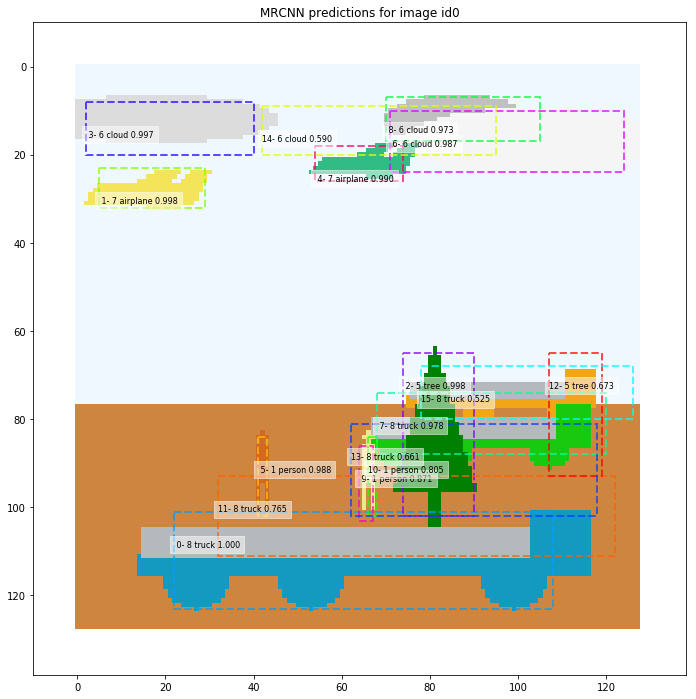

In [22]:
vis2.display_pr_scores(results[0], class_names)

In [53]:
vis2.display_pr_hm_scores(results[0]['pr_hm_scores'], class_names)

(9, 64, 24)
  classes     :  range(0, 9)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                         |  |                 |           alt score 0      |              alt score 1              |                alt score 2            |
        class            |  | mrcnn   normlzd |  gauss     bbox   nrm.scr* |  ga.sum     mask    score      norm   |   ga.sum     mask     score   norm    |
seq  id     name         |  | score   score   |  sum       area   gau.sum  |  in mask    sum                score  |   in mask    sum              score   |    CX      CY      AREA
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 59   1 person           | 1| 0.9881   1.0000 | 0.6390    36.0000   0.6390 |   8.1932   12.0000   

### Display detections on Image

Image Meta:  [        33        128        128          3          0          0        128        128          1          1]


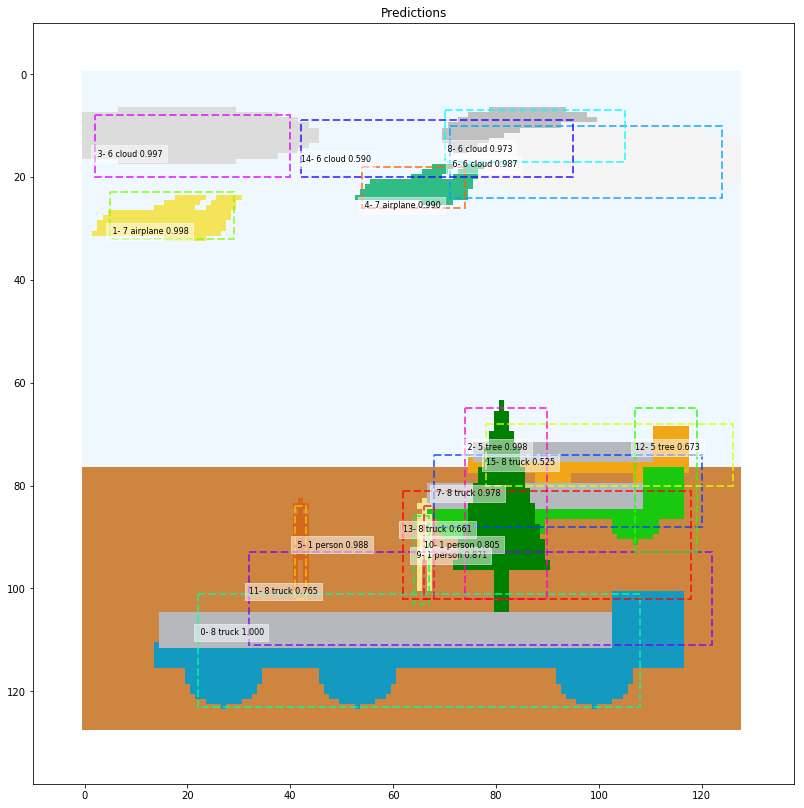

In [60]:
from mrcnn.utils import log # Display results
ax = visualize.get_ax(rows =1, cols = 1, size= 14)
r = results[0]
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                            ax=ax, title="Predictions", score_range=(0.0, 1.7))

### Compute mAP and Display Precision/Recall Curve

[    0.6851     0.6833     0.7068     0.6716     0.6718     0.6828     0.6786     0.6585     0.6374     0.6122     0.5563     0.5482     0.4537     0.4646     0.4228     0.3591]
[    0.6851     0.6833     0.7068     0.6716     0.6718     0.5062     0.6786     0.6585     0.6374     0.5453     0.6349     0.5482     0.4537     0.4646     0.4228     0.3591]


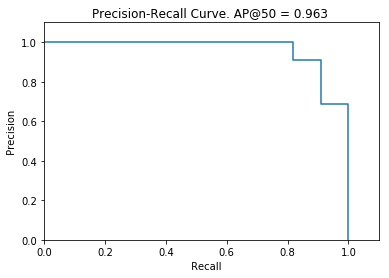

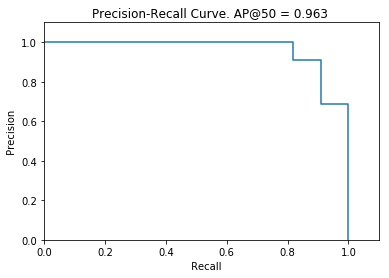

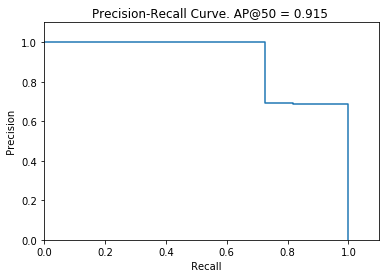

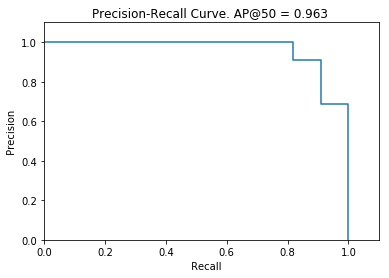

In [66]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 20

# Draw precision-recall curve
r = results[0]
print(r['pr_scores'][:,alt_scr_1])
print(r['pr_scores'][:,alt_scr_2])
### r['scores'] and  r['pr_scores'][:,orig_score] ARE THE SAME
### r['pr_scores'][:,alt_scr_1] and r['pr_scores'][:,alt_scr_2] ARE THE SAME

# AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['scores'])
# visualize.plot_precision_recall(AP, precisions, recalls)
# same as above

AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,orig_score])
visualize.plot_precision_recall(AP, precisions, recalls)

AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,norm_score])
visualize.plot_precision_recall(AP, precisions, recalls)

AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_0])
visualize.plot_precision_recall(AP, precisions, recalls)

AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_1])
visualize.plot_precision_recall(AP, precisions, recalls)
 

##  Run MRCNN detection pipeline on second image

### Load an image using `get_inference_batch()`

In [ ]:
# from mrcnn.prep_notebook import get_image_batch, get_training_batch
# # images = get_image_batch(dataset_test, 4737, display = True)
image, _ = get_inference_batch(dataset_test,mrcnn_model, 4745, display=True)

In [ ]:
# from mrcnn.prep_notebook import run_fcn_detection
# fcn_results, fcn_gt_data = run_fcn_detection(fcn_model, mrcnn_model,dataset_test, image_id=1927, verbose = 1)
results= run_mrcnn_detection(mrcnn_model,dataset_test, image_ids=4745, verbose = 0, display = True)

###  Display Results

In [ ]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

#### Display MRCNN scores - 1st style

In [ ]:
lmt =15
r = results[0]
print('       classes :', r['class_ids'][:lmt])
names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in r['class_ids'][:lmt]])

print('               : ', names)
print('                ', r['detection_ind'][:lmt])
print('   orig scores :',r['scores'][:lmt])
print('   norm scores :', r['pr_scores'][:lmt,8])
# print('  pr_scores[5] :', r['pr_scores'][:,5])

print('-'*185)
print('   pr_scrs[11] :', r['pr_scores'][:lmt,11])
# print(' fcn_scores[8] :', r['fcn_scores'][:lmt,11])
print()
print(' pr_scores[14] :', r['pr_scores'][:lmt,14])
# print('fcn_scores[13] :', r['fcn_scores'][:lmt,14])
print()
print(' pr_scores[20] :', r['pr_scores'][:lmt,20])
# print('fcn_scores[19] :', r['fcn_scores'][:lmt,20])

### Display detections on Image

In [ ]:
from mrcnn.utils import log # Display results
ax = visualize.get_ax(rows =1, cols = 1, size= 20)
r = results[0]
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                            ax=ax, title="Predictions", score_range=(0.0, 1.7))

### Compute mAP and Display Precision/Recall Curve

In [ ]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 18

# Draw precision-recall curve
r = results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['scores'])
visualize.plot_precision_recall(AP, precisions, recalls,ttl = "- Orig Score")
# same as above
# AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,orig_score])
# visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,norm_score])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Normlzd Score")
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_0])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Alt Score 0 ")
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_1])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Alt Score 1")
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bbox'], r['gt_class_id'], r['molded_rois'], r['class_ids'], r['pr_scores'][:,alt_scr_2])
visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Alt Score 1")
  

##  Run MRCNN detection pipeline on third image

### Load an image using `get_inference_batch()`

In [ ]:
# 13378, 33816
# image, _ = get_inference_batch(dataset_test, mrcnn_model, 13378, display=True)    

In [ ]:
results= run_mrcnn_detection(mrcnn_model,dataset_test, image_id=13378, verbose = 0)
r = results[0]

### Display detections on Image

In [ ]:
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                             title="Predictions", score_range=(0.0, 0.7))


# Run FCN Detection pipeline on images

##  Run FCN detection pipeline on first image

### Load an image using `get_inference_batch()` or `image_id`

In [ ]:
# image, _ = get_inference_batch(dataset_test,mrcnn_model, 33, display=True)
IMG = 158
IMG = 310
IMG = 336
IMG =  87
IMG = 33
# image = get_image_batch(dataset_test, image_ids = [IMG],display=True)

fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_ids = [IMG], verbose = 1)

### Experimenation on softmax

In [11]:
fcn_sm = fcn_results[0]['fcn_sm']
fcn_hm = fcn_results[0]['fcn_hm']
print(fcn_sm.shape, fcn_hm.shape)

(128, 128, 7) (128, 128, 7)


#### compute softmax from fcn_hm and verify it gives the same output as fcn_sm returned from model

In [91]:
# hm = fcn_hm
# mx = np.max(hm[:,:,:], axis=-1, keepdims=True)
# ee = np.exp(hm[:,:,:] - mx)
# ss = np.sum(ee, axis = -1, keepdims = True)
# s1 = ee/ss
# print('MX    : ',mx.shape)    
# print(mx[:10,:10,0])
# print('EE    : ',ee.shape)
# print('SS    : ',ss.shape)
# print('EE/SS : ',s1.shape)
# # smax = np.dstack((np.zeros_like(hm[:,:,:1]), (ee/ss)))
# smax = s1
# print('SMAX  : ',smax.shape)
# print(smax[:10,:10,0])
# print(smax[:10,:10,1])
# cls_max = np.argmax(smax, axis = -1)
# print('CLS_MAX : ',cls_max.shape)
# print(utils.mask_string(cls_max))

#### fcn_sm directly from FCN model

In [10]:
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =100000)
dataset_test.display_active_class_info()
sm =  fcn_results[0]['fcn_sm']
cls_max2 = np.argmax(sm, axis = -1)
print('CLS_MAX2 : ',cls_max2.shape)
print(utils.mask_string(cls_max2))

[1, 2, 3, 4, 5, 6]
internal_class:  1 ext_cls: 1 name: None - person
internal_class:  2 ext_cls: 2 name: None - car
internal_class:  3 ext_cls: 3 name: None - sun
internal_class:  4 ext_cls: 4 name: None - building
internal_class:  5 ext_cls: 5 name: None - tree
internal_class:  6 ext_cls: 6 name: None - cloud
CLS_MAX2 :  (128, 128)
[[00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [000

In [97]:
# for cls in range(7):
#     print('CLASS :', cls , '-----------------')
#     for i in range(10):
#         print(fcn_sm[i,:10,cls])
#     print('hm')
#     for i in range(10):
#         print(fcn_hm[i,:10,cls])
#     print()

## Display FCN detections on Image

Detected classes: [1 5 6 7 8]
Image Meta     :  [ 33 128 128   3   0   0 128 128   1   1]
Orig Image Meta:  [ 33 128 128   3   0   0 128 128   1   1]


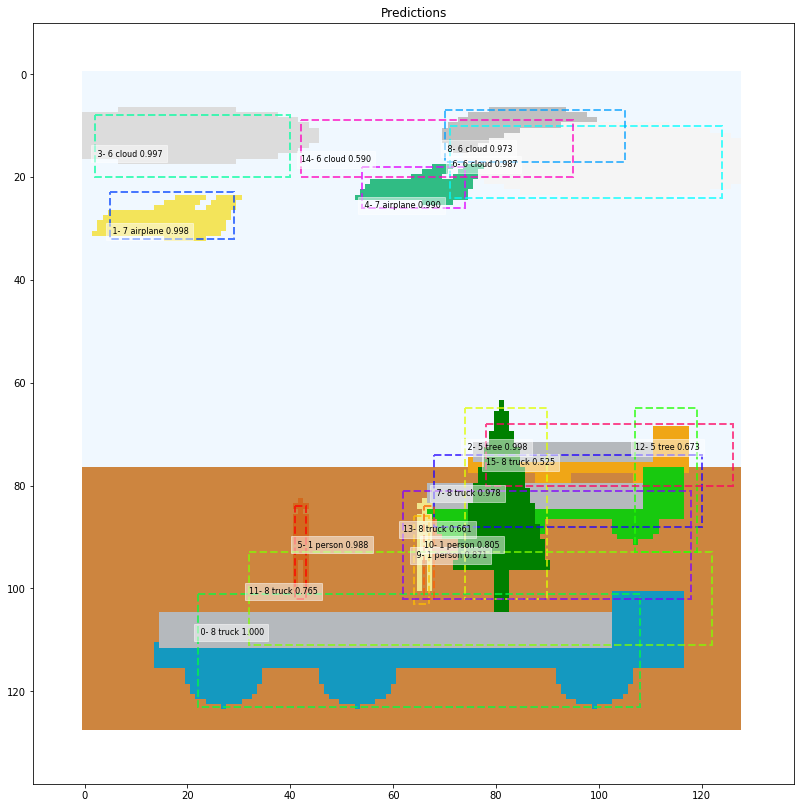

In [10]:
f = fcn_results[0]
print('Detected classes:', np.unique(f['class_ids']))
print('Image Meta     : ', f['image_meta'][:10])
print('Orig Image Meta: ', f['orig_image_meta'][:10])
visualize.display_instances(f['image'], f['rois'],  f['class_ids'], dataset_test.class_names, f['scores'], title="Predictions", score_range=(0.0, 1.7), size =14)

####  Display scores on image

GT classes:  [1 6]
Detected classes: [1 6]
Image Meta:  [ 22 128 128   3   0   0 128 128   1   1]
 Image_id    :  33  Reference:  [('sun', (156, 23, 99), (57, 7, 4, 4)), ('cloud', (122, 49, 197), (84, 26, 27, 9)), ('building', (206, 6, 196), (44, 52, 12, 14)), ('building', (210, 107, 199), (52, 68, 16, 22)), ('tree', (163, 207, 66), (22, 68, 14, 14)), ('car', (186, 144, 59), (96, 73, 18, 9)), ('person', (92, 247, 18), (33, 78, 2, 13)), ('car', (138, 96, 8), (63, 83, 21, 10)), ('person', (237, 251, 107), (37, 98, 3, 17)), ('person', (113, 4, 196), (50, 104, 3, 19))] Coco Id: 33
 Image meta  :  [ 33 128 128   3   0   0 128 128   1   1]
 Class ids   :  (10,)    [3 6 4 4 5 2 1 2 1 1]
 Class Names :  ['sun', 'cloud', 'building', 'building', 'tree', 'car', 'person', 'car', 'person', 'person']


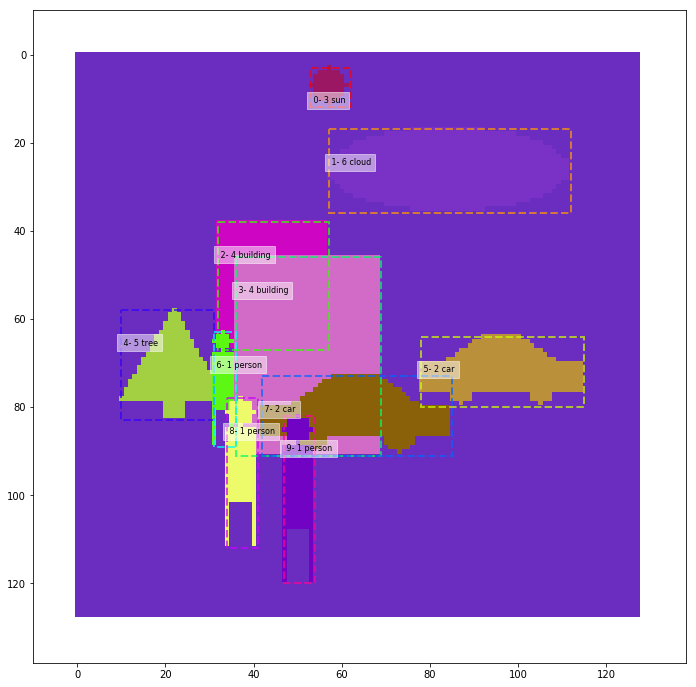

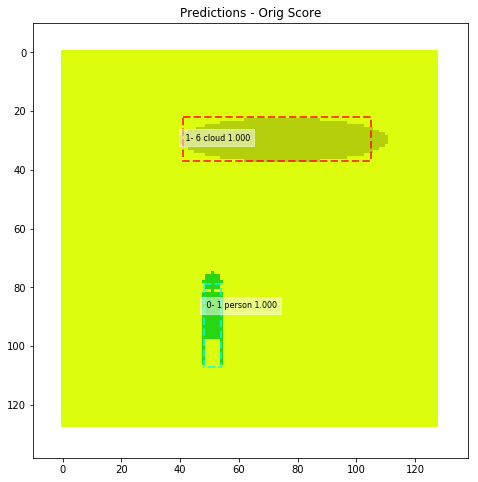

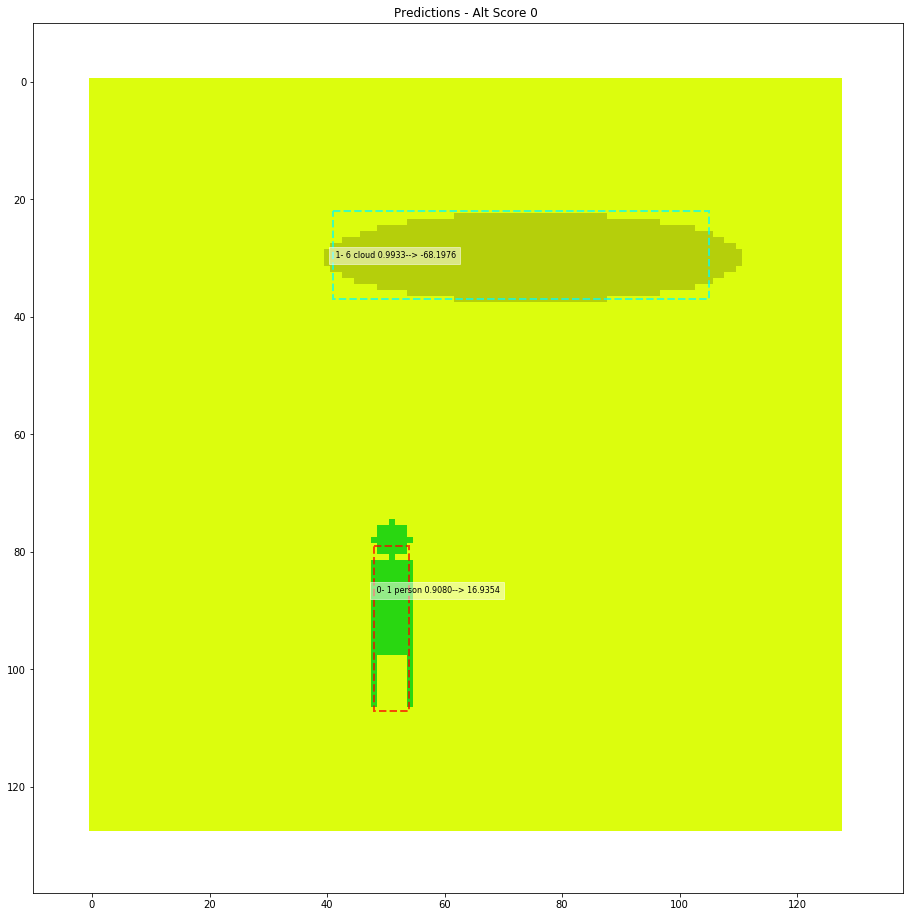

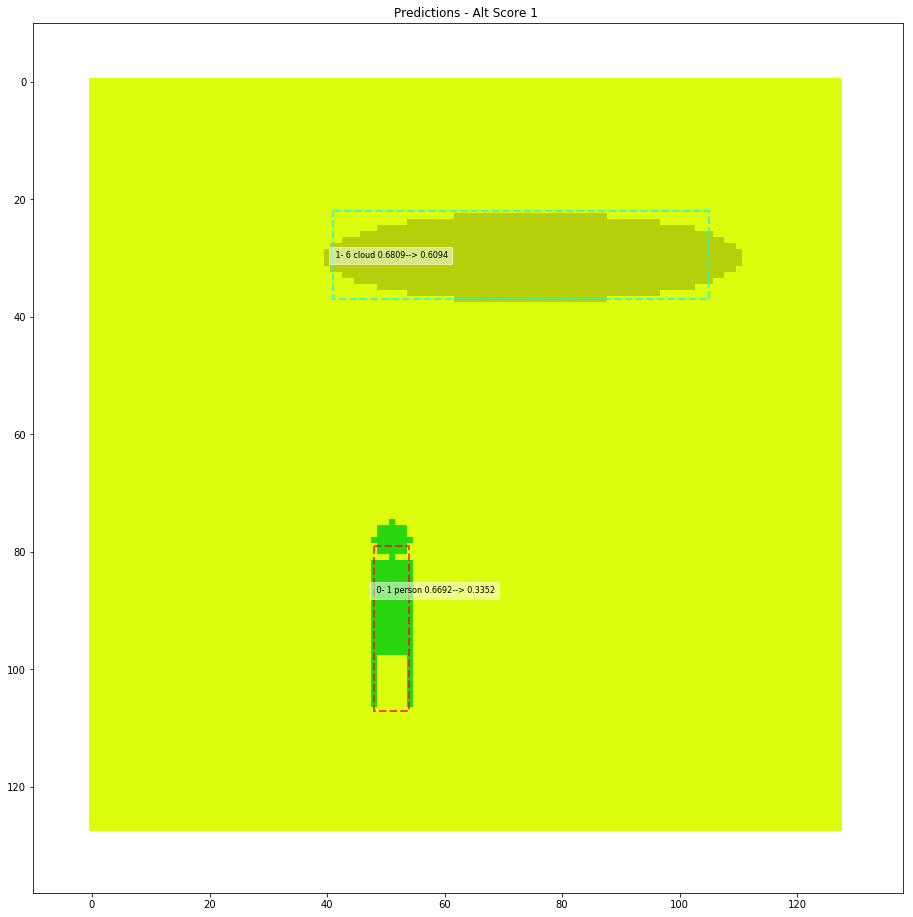

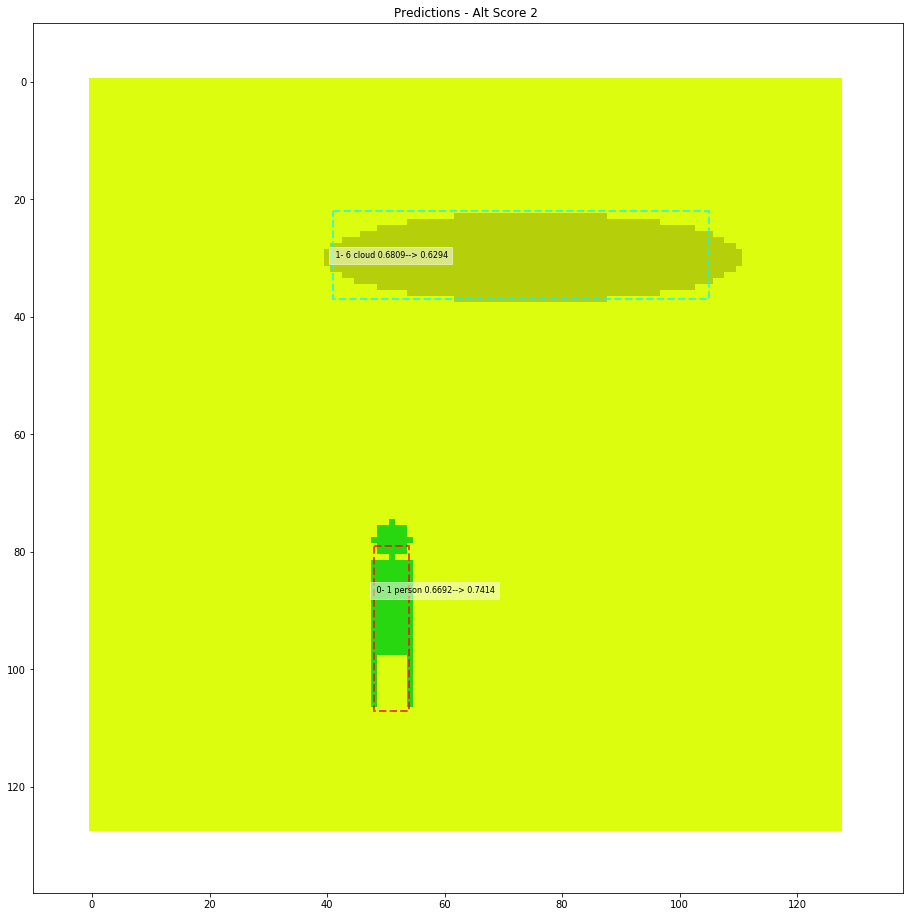

In [114]:
#### Display detections
## old_score   : 11
## alt_score_1 : 14
## alt_score_2 : 20
f = fcn_results[0]
# print('class ids: ', np.unique(f['pr_scores'][:,4]).astype(int).tolist())
det_classes = np.unique(f['class_ids'])
print('GT classes: ', np.unique(f['gt_class_ids']))
print('Detected classes:', det_classes)
print('Image Meta: ', f['orig_image_meta'][:10])
clses = None
visualize.display_image_gt(dataset_test, mrcnn_model.config, 33)
# visualize.display_instances_from_prscores(f['image'], f['pr_scores'], class_names, score_range=(-999, 9999), only_classes = [1])
# visualize.display_instances(f['image'], f['rois'],  f['class_ids'], class_names, f['scores'], title="Predictions", score_range=(0.7, 0.99), size = 24)
visualize.display_instances(f['image'], f['rois'], f['class_ids'], class_names, f['scores'], title="Predictions - Orig Score", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,11], f['fcn_scores'][:,11],title="Predictions - Alt Score 0 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,14], f['fcn_scores'][:,14],title="Predictions - Alt Score 1 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,20], f['fcn_scores'][:,20],title="Predictions - Alt Score 2 ", only_classes=clses)
## display normalized scores 
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:, 8], f['fcn_scores'][:, 8],title="Predictions - Orig Score  (Normalized by class)", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,17], f['fcn_scores'][:,17],title="Predictions - Alt Score 1 (Normalized by class)", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,23], f['fcn_scores'][:,23],title="Predictions - Alt Score 2 (Normalized by class)", only_classes=clses)


## Display Results

In [72]:
f = fcn_results[0]
for i,j in zip(f['gt_class_ids'], f['gt_bboxes']):
    print(i, ' ', j )
ovl = utils.compute_overlaps(f['gt_bboxes'], f['gt_bboxes'])
print()
for i,j in zip(f['gt_class_ids'], ovl):
    print('{:2d}  - {:15s}  {}' .format(i,dataset_test.class_names[i],j))
 

6   [ 7  0 18 46]
6   [  7  70  16 100]
6   [ 10  74  25 128]
7   [18 53 26 78]
7   [24  2 33 31]
8   [ 69  75  80 118]
8   [ 77  67  92 117]
1   [ 83  41 101  44]
1   [ 83  65 101  68]
5   [ 64  72 105  91]
8   [101  14 124 117]

 6  - cloud            [1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 6  - cloud            [0.0000 1.0000 0.1688 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 6  - cloud            [0.0000 0.1688 1.0000 0.0285 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 7  - airplane         [0.0000 0.0000 0.0285 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 7  - airplane         [0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
 8  - truck            [0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.1149 0.0000 0.0000 0.1636 0.0000]
 8  - truck            [0.0000 0.0000 0.0000 0.0000 0.0000 0.1149 1.0000 0.0000 0.0113 0.2291 0.0000]
 1  - person           [0.0000 0.0000 0.0000 0.0000 0.0

In [45]:

# print(utils.compute_one_iou([58, 28, 78, 44],[ 37, 76, 68, 99]  ))
# print(utils.compute_one_iou([58, 28, 78, 44],[ 49,  41, 108,  82] ))
# print(utils.compute_one_iou([58, 28, 78, 44],[47, 32, 76, 66])) 
# 56  63  77  68
# Image 87 iou between SUN Gt and detected boxes
# print(utils.compute_one_iou([15,  48,  22,  65 ] , [14,  52,  19,  63 ]))
# Image 386 iou between person GT and detected boxes
# print(utils.compute_one_iou([56, 63 ,77 ,68] ,[71,  9, 86, 48]))
# print(utils.compute_one_iou([56, 63 ,77 ,68] ,[63, 51, 77, 80]))
# IMage 344 - Very short building in top of image
# print(utils.compute_one_iou([37,  52,  43,  75] ,[40,  39,  55,  66]))
# print(utils.compute_one_iou([37,  52,  43,  75] ,[39,  89,  72, 116]))
# print(utils.compute_one_iou([37,  52,  43,  75] ,[43,  63,  73,  92]))

 Intersection: 42   Union: 501   IoU: 0.08383233532934131 
0.08383233532934131
 Intersection: 0   Union: 1029   IoU: 0.0 
0.0
 Intersection: 0   Union: 1008   IoU: 0.0 
0.0


In [16]:
for scr, pr_scr, cls, fcn_scr in zip(f['scores'],  f['pr_scores'], f['class_ids'], f['fcn_scores']):
    print("cls: {:2d}  scr: {:7.5f}   | pr_cls: {:2.0f}  pr_scr: {:7.5f}  norm_scr: {:7.5f}   ALT Scr0: {:9.4f}  Alt1: {:7.5f}  Alt2: {:7.5f}   ".
        format(cls, scr, pr_scr[4], pr_scr[5], pr_scr[8], pr_scr[11], pr_scr[14], pr_scr[20])) 
    print("                        | fc_cls: {:2.0f}  fc_scr: {:7.5f}  norm_scr: {:7.5f}   ALT Scr0: {:9.4f}  Alt1: {:7.5f}  Alt2: {:7.5f}    ".
        format(fcn_scr[4], fcn_scr[5], fcn_scr[8], fcn_scr[11], fcn_scr[14], fcn_scr[20])) 
    print()

cls:  8  scr: 0.99990   | pr_cls:  8  pr_scr: 0.99990  norm_scr: 1.00000   ALT Scr0:    0.9990  Alt1: 0.68508  Alt2: 0.68508   
                        | fc_cls:  8  fc_scr: 0.99990  norm_scr: 1.00000   ALT Scr0: -327.8563  Alt1: 0.72646  Alt2: 0.63388    

cls:  7  scr: 0.99821   | pr_cls:  7  pr_scr: 0.99821  norm_scr: 1.00000   ALT Scr0:    0.9623  Alt1: 0.68331  Alt2: 0.68331   
                        | fc_cls:  7  fc_scr: 0.99821  norm_scr: 1.00000   ALT Scr0:    0.7302  Alt1: 0.87865  Alt2: 0.61714    

cls:  5  scr: 0.99751   | pr_cls:  5  pr_scr: 0.99751  norm_scr: 1.00000   ALT Scr0:    0.9949  Alt1: 0.70679  Alt2: 0.70679   
                        | fc_cls:  5  fc_scr: 0.99751  norm_scr: 1.00000   ALT Scr0:  -59.1119  Alt1: 0.75602  Alt2: 0.69364    

cls:  6  scr: 0.99691   | pr_cls:  6  pr_scr: 0.99691  norm_scr: 1.00000   ALT Scr0:    0.9843  Alt1: 0.67157  Alt2: 0.67157   
                        | fc_cls:  6  fc_scr: 0.99691  norm_scr: 1.00000   ALT Scr0: -133.3592  Al

#### display mrcnn scores 

Image id: 33

GT_BOXES for image  33
--------------------------------------------------------------------------------
        class             |                              
seq  id name              |  Y1  X1  Y2  X2     CX     CY    AREA
--------------------------------------------------------------------------------
  0  6 cloud              |   7   0  18  46    23.0   12.5   506.00
  1  6 cloud              |   7  70  16 100    85.0   11.5   270.00
  2  6 cloud              |  10  74  25 128   101.0   17.5   810.00
  3  7 airplane           |  18  53  26  78    65.5   22.0   200.00
  4  7 airplane           |  24   2  33  31    16.5   28.5   261.00
  5  8 truck              |  69  75  80 118    96.5   74.5   473.00
  6  8 truck              |  77  67  92 117    92.0   84.5   750.00
  7  1 person             |  83  41 101  44    42.5   92.0    54.00
  8  1 person             |  83  65 101  68    66.5   92.0    54.00
  9  5 tree               |  64  72 105  91    81.5   84.5   779.

  FCN BBox Information - classes     :  [    1.0000     5.0000     6.0000     7.0000     8.0000]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                         |                                                 |    (COVAR)    |               CLIP REGION   
BOX     class                                            |                   Width   Height                |      SQRT     |      FROM/TO               FROM/TO 
seq  id     name              Y1/X1              Y2/X2   |    CX / CY         (W)  ~  (H)      AREA        |  W/2     H/2  |  X       Y        A |  X       Y       A
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 64   8 truck           (101.00, 22.00)  (123.00,108.00) |  65.00/112.

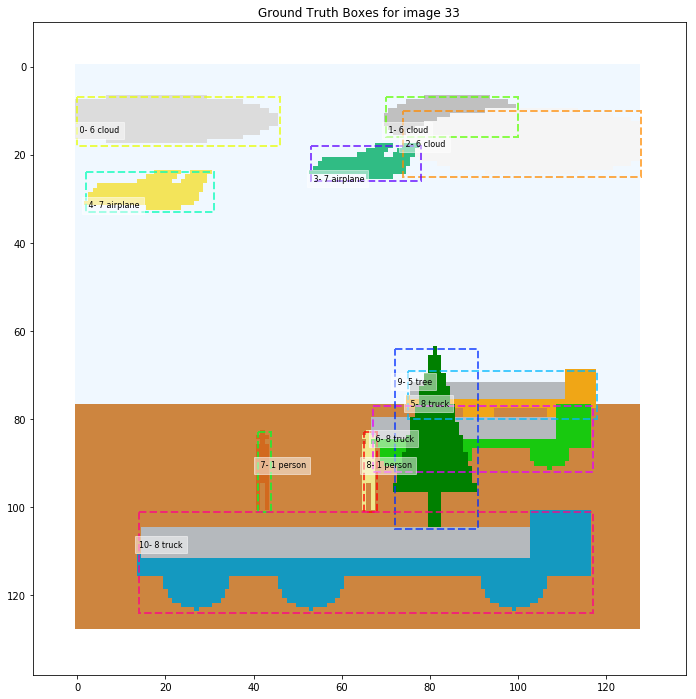

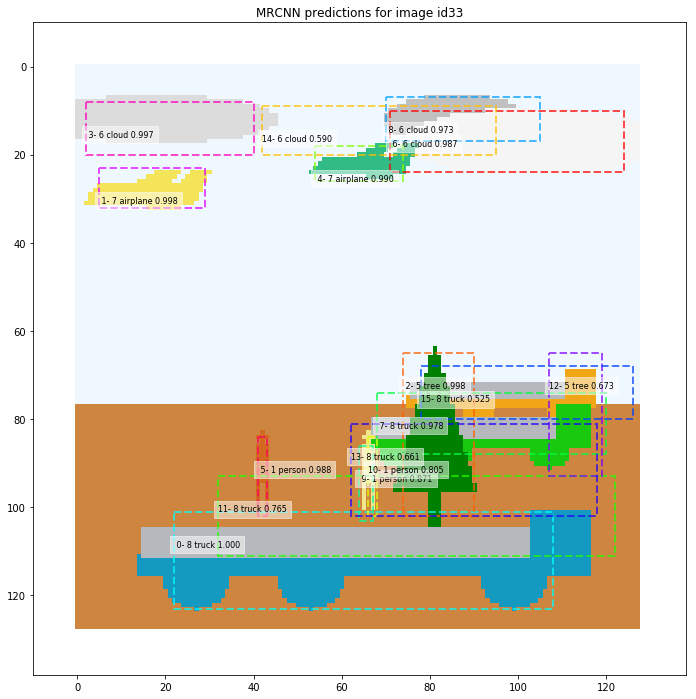

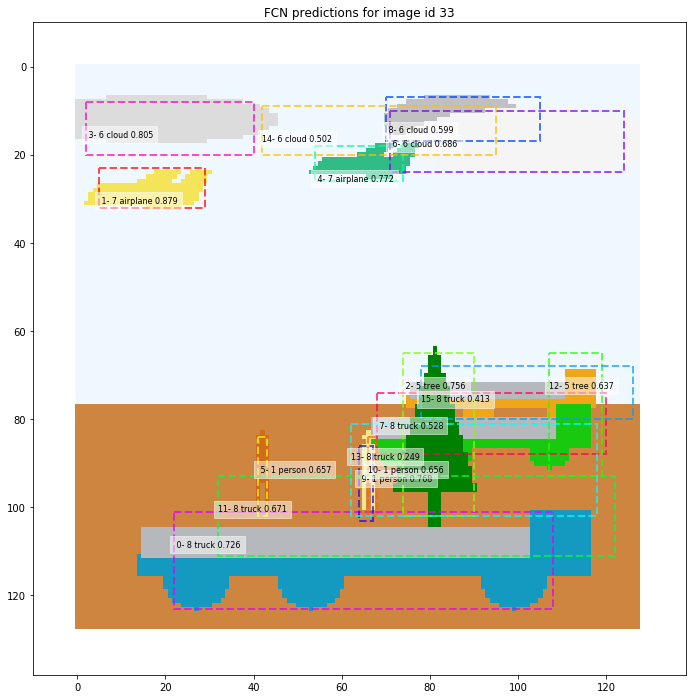

In [30]:
print('Image id:', IMG)
f = fcn_results[0]
cls = None

vis2.display_gt_bboxes(dataset_test, mrcnn_model.config, image_id = IMG, only = cls)
vis2.display_pr_scores(f, class_names, only = cls)
vis2.display_fcn_scores(f, class_names, only = cls)
vis2.display_fcn_scores_box_info(f['fcn_scores'], f['fcn_hm'], class_names, only = cls)


#### Display MRCNN and FCN scores - 1st style

In [38]:
#### detections as returned from the model's `detect()` functon

lmt =18
f = fcn_results[0]
names  = " ".join([ '{:>10s}'.format(class_names[i][-10:]) for i in f['pr_scores'][:lmt, 4].astype(np.int32)])

print('         bbox seq id :', f['pr_scores'][:lmt,7].astype(int))
print('  f[class_ids] class :', f['class_ids'][:lmt])
print('   f[pr_score] class :', f['pr_scores'][:lmt,4].astype(np.int))
print('  f[fcn_score] class :', f['fcn_scores'][:lmt,4].astype(np.int))
print('                       ', names)
print('           TP/FP Ind :', f['pr_scores'][:lmt,6].astype(np.int))
print('      pr  orig score :', f['pr_scores'][:lmt,5])
print('      fcn orig score :', f['fcn_scores'][:lmt,5])
print('      cls norm score :', f['pr_scores'][:lmt,8])
print('           bbox area :', f['pr_scores'][:lmt,10])
print('           clip area :', f['pr_scores'][:lmt,13])
print()
print('-'*185)
print('     pr_score_0 [11] :', f['pr_scores'][:lmt,11])
print('    fcn_score_0 [11] :', f['fcn_scores'][:lmt,11])
print()
print('     pr_score_1 [14] :', f['pr_scores'][:lmt,14])
print('    fcn_score_1 [14] :', f['fcn_scores'][:lmt,14])
print()
print('     pr_score_2 [20] :', f['pr_scores'][:lmt,20])
print('    fcn_score_2 [20] :', f['fcn_scores'][:lmt,20])
print()
print('norm pr_score_1 [17] :', f['pr_scores'][:lmt,17])
print('norm fcn_score  [17] :', f['fcn_scores'][:lmt,17])
print()
print('norm pr_score_2 [23] :', f['pr_scores'][:lmt,23])
print('norm fcn_score  [23] :', f['fcn_scores'][:lmt,23])


         bbox seq id : [        64         63         62         61         60         59         58         57         56         55         54         53         52         51         50         49]
  f[class_ids] class : [         8          7          5          6          7          1          6          8          6          1          1          8          5          8          6          8]
   f[pr_score] class : [         8          7          5          6          7          1          6          8          6          1          1          8          5          8          6          8]
  f[fcn_score] class : [         8          7          5          6          7          1          6          8          6          1          1          8          5          8          6          8]
                             truck   airplane       tree      cloud   airplane     person      cloud      truck      cloud     person     person      truck       tree      truck      cloud      tr

#### Display MRCNN  and FCN scores - 2nd style

In [33]:
f = fcn_results[0]
for pr_scr, fcn_scr in zip(f['pr_scores'], f['fcn_scores']):
    int_cls = pr_scr[4].astype(np.int)
    print('{:2d}  {:.<18s}  {}  '.format(int_cls, class_names[int_cls], fcn_scr[:9]))
    print('{:>40s} {}'.format(' Bbox Coordinates: ', pr_scr[:4]))
    print('{:>40s} {}'.format('Orig / Norm score: ',  pr_scr[[5,8]]))
    print('{:>40s} {}'.format(' mrcnn score 0:  ',  pr_scr[[9,10,11]]))
    print('{:>40s} {}'.format('   fcn score 0:  ', fcn_scr[[9,10,11]]))
    print()
    print('{:>40s} {}'.format(' mrcnn score 1:  ', pr_scr[[12,13,14,15,16,17]]))
    print('{:>40s} {}'.format(' mrcnn_score 2:  ', pr_scr[[18,19,20,21,22,23]]))
    print()
    print('{:>40s} {}'.format('  fcn scores 1:  ', fcn_scr[[12,13,14,15,16,17]]))
    print('{:>40s} {}'.format('  fcn scores 2:  ', fcn_scr[[18,19,20,21,22,23]]))
    print()

 8  truck.............  [  101.0000    22.0000   123.0000   108.0000     8.0000     0.9999     1.0000    64.0000     1.0000]  
                      Bbox Coordinates:  [  101.0000    22.0000   123.0000   108.0000]
                     Orig / Norm score:  [    0.9999     1.0000]
                        mrcnn score 0:   [    0.9990  1892.0000     0.9990]
                          fcn score 0:   [ -327.8563  1892.0000  -327.8563]

                        mrcnn score 1:   [   67.1375    98.0000     0.6851     1.0000     1.0000     1.0000]
                        mrcnn_score 2:   [   67.1375    98.0000     0.6851     1.0000     1.0000     1.0000]

                         fcn scores 1:   [   71.1930    98.0000     0.7265     1.0000     1.0000     1.0000]
                         fcn scores 2:   [   62.1198    98.0000     0.6339     1.0000     1.0000     1.0000]

 7  airplane..........  [   23.0000     5.0000    32.0000    29.0000     7.0000     0.9982     1.0000    63.0000     1.0000]  
   

####  Display MRCNN  and FCN scores - 3rd style

In [34]:
# r = results[0]
print(f['detections'].shape)
print('   old_scores: (gauss. sum over large bbox/bbox area/ gauss_sum * normlzd_score))')
print('  alt_scores 1: (gauss. sum over small mask/mask area/ gauss_sum / mask_area):  ')
sort_by_class_order = np.argsort(f['class_ids'])


# for i in range(len( f['class_ids'])):
for i in sort_by_class_order:
#     print(i , f['rois'][i].astype(np.float), f['scores'][i], f['class_ids'][i], class_names[f['class_ids'][i]])
#     print(i , f['detections'][i], f['class_ids'][i], class_names[f['class_ids'][i]])
    det_type = '       --> ADDED FP ' if f['pr_scores'][i,6] == -1 else '      Original detection'
    print(i , f['pr_scores'][i,:9], f['pr_scores'][i,4], class_names[ f['pr_scores'][i,4].astype(np.int)], det_type) 
    print()
    print(i , 'pr: old_scores [9,10,11]:  '.rjust(90), f['pr_scores'][i,9:12])    
    print(i , '  alt_scores 1 [12 - 17]:  '.rjust(90), f['pr_scores'][i,12:18])    
    print(i , '  alt_scores 2 [18 - 23]:  '.rjust(90), f['pr_scores'][i,18:23])    
    print(i)
#     print(i , f['fcn_scores'][i,:8], f['fcn_scores'][i,4], class_names[ f['fcn_scores'][i,4].astype(np.int)])    
    print(i , 'fcn: old_scores [9,10,11]:  '.rjust(90), f['fcn_scores'][i,9:12])    
    print(i ,  '  alt_scores 1 [12 - 17]:  '.rjust(90), f['fcn_scores'][i,12:18])    
    print(i ,  '  alt_scores 2 [18 - 23]:  '.rjust(90), f['fcn_scores'][i,18:23])    
    print()
    print(i , '  old score [11]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,11] ,f['fcn_scores'][i,11]))
    print(i , 'alt score 1 [14]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,14],f['fcn_scores'][i,14]))
    print(i , 'alt score 2 [20]:  '.rjust(90), ' from mrcnn:{:10.4f}  from FCN: {:10.4f} '.format(f['pr_scores'][i,20],f['fcn_scores'][i,20]))
    print()

(64, 7)
   old_scores: (gauss. sum over large bbox/bbox area/ gauss_sum * normlzd_score))
  alt_scores 1: (gauss. sum over small mask/mask area/ gauss_sum / mask_area):  
5 [   84.0000    41.0000   102.0000    43.0000     1.0000     0.9881     1.0000    59.0000     1.0000] 1.0 person       Original detection

5                                                                pr: old_scores [9,10,11]:   [    0.6390    36.0000     0.6390]
5                                                                  alt_scores 1 [12 - 17]:   [    8.1932    12.0000     0.6828     0.7435     0.6667     1.0000]
5                                                                  alt_scores 2 [18 - 23]:   [    6.0742    12.0000     0.5062     0.6188     0.6667]
5
5                                                               fcn: old_scores [9,10,11]:   [    4.1595    36.0000     4.1595]
5                                                                  alt_scores 1 [12 - 17]:   [    7.8888    12.0000     

In [12]:
np_format = {}
float_formatter = lambda x: "%9.4f" % x
int_formatter   = lambda x: "%9d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=210, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [105]:
# f = fcn_results[0]
# print(f['pr_scores'][:,4], f['pr_scores'][:,5])
# print(f['fcn_scores'][:,4], f['fcn_scores'][:,5])
# print(f['class_ids'], f['scores'])
# print(f['pr_scores'][:,4:])

# print(f['molded_rois'])
# print(f['pr_hm_scores'].shape)
# print(f['pr_hm_scores'][:,:3,:4])
# print(f['pr_scores_by_class'].shape)
# print(f['pr_scores_by_class'][:,:3,:4])
# print()
# print(f['detections'][:20])
# print(f['scores'])
# print(f['class_ids'])
# print(f['pr_scores'][:,:7])
# print(f['gt_bboxes'])
# print(f['gt_class_ids'])

### Compute mAP and Display Precision/Recall Curve

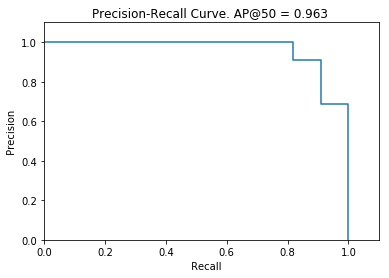

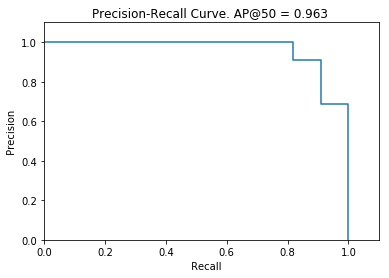

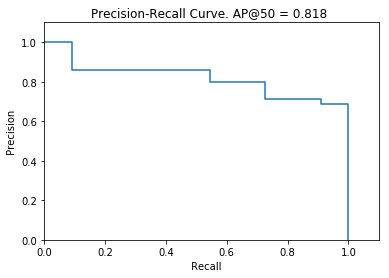

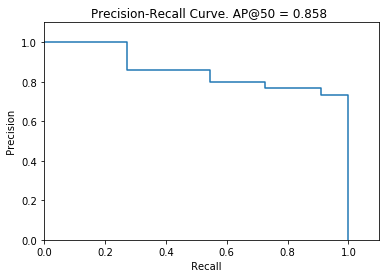

In [45]:
# Draw precision-recall curve
f= fcn_results[0]




orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 20

# print(f['pr_scores'][:,alt_scr_1])
# print(f['pr_scores'][:,alt_scr_2])
# print(f['scores'])
# print(f['fcn_scores'][:, orig_score])
### f['scores'] and  f['pr_scores'][:,orig_score] ARE THE SAME
### f['pr_scores'][:,alt_scr_1] and f['pr_scores'][:,alt_scr_2] ARE THE SAME

# Draw precision-recall curve
# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['scores'])
# visualize.plot_precision_recall(AP, precisions, recalls)
# same as above

AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,orig_score])
visualize.plot_precision_recall(AP, precisions, recalls)

AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,norm_score])
visualize.plot_precision_recall(AP, precisions, recalls)

AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_scr_0])
visualize.plot_precision_recall(AP, precisions, recalls)

AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_scr_1])
visualize.plot_precision_recall(AP, precisions, recalls)
 

#  Compute AP routine

In [ ]:
from mrcnn.utils import trim_zeros, compute_overlaps
def compute_ap(gt_boxes, gt_class_ids,
               pred_boxes, pred_class_ids, pred_scores,
               iou_threshold=0.5):
    '''
    Compute Average Precision at a set IoU threshold (default 0.5).

    Returns:
    mAP:            Mean Average Precision
    precisions:     List of precisions at different class score thresholds.
    recalls:        List of recall values at different class score thresholds.
    overlaps:       [pred_boxes, gt_boxes] IoU overlaps.
    '''
    # Trim zero padding and sort predictions by score from high to low
    # TODO: cleaner to do zero unpadding upstream
    gt_boxes   = trim_zeros(gt_boxes)
    pred_boxes = trim_zeros(pred_boxes)
    pred_scores= pred_scores[:pred_boxes.shape[0]]
    indices    = np.argsort(pred_scores)[::-1]   ## sort indices from largest to smallest
    print('arg_sort indicies:', indices)
    pred_boxes     = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores    = pred_scores[indices]
    
    print(' Total predicitons: ')
    print(len(pred_class_ids), len(pred_boxes), len(pred_scores))
    # Compute IoU overlaps [pred_boxes, gt_boxes]
    overlaps = compute_overlaps(pred_boxes, gt_boxes)
    print('ovelatps: ',overlaps.shape)
    print(overlaps)
    
    # Loop through ground truth boxes and find matching predictions
    match_count = 0
    pred_match = np.zeros([pred_boxes.shape[0]])
    gt_match   = np.zeros([gt_boxes.shape[0]])
    
    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] == 1:
                continue
            # If we reach IoU smaller than the threshold, end the loop
            iou = overlaps[i, j]
            if iou < iou_threshold:
                break
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                match_count  += 1
                gt_match[j]   = 1
                pred_match[i] = 1
                break
    print(' after overlap computation')
    print('pred_match :', pred_match)
    print('  gt_match :', gt_match)
    # Compute precision and recall at each prediction box step
    precisions = np.cumsum(pred_match) / (np.arange(len(pred_match)) + 1)
    recalls    = np.cumsum(pred_match).astype(np.float32) / len(gt_match)
    
    print(' precisions')
    print(np.cumsum(pred_match), '/', (np.arange(len(pred_match)) + 1))
    print(precisions)
    print()
    print(' recalls ')
    print(np.cumsum(pred_match), '/', len(gt_match))
    print(recalls)
    print()
    
    # Pad with start and end values to simplify the math
    precisions = np.concatenate([[0], precisions, [0]])
    recalls    = np.concatenate([[0], recalls, [1]])
    print('appended [0/0], [0/1] to front/end of precisions/recalls')
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    
    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = np.maximum(precisions[i], precisions[i + 1])
    print('backtracking precsiosn values:', list(range(len(precisions) - 2, -1, -1)))
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    # Compute mean AP over recall range
    print(' Rc[:-1] : ', recalls[:-1])
    print(' Rc[1:]  : ', recalls[1:])
    print(' Pr[1:]  : ', precisions[1:])
    print()

    ## find points where recall values changes 
    indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
    mAP     = np.sum((recalls[indices] - recalls[indices - 1]) * precisions[indices])
    
    print('where recalls[:-1] != recalls[1:]:', np.where(recalls[:-1] != recalls[1:]))
    print('indices at recall changes : ', indices)
    print(' A1: recall[indices]  : ', recalls[indices])
    print(' A2: recall[indices-1]: ', recalls[indices-1])
    print(' A1 - A2              : ', (recalls[indices] - recalls[indices - 1]))
    print(' P1:precision[indices]: ', precisions[indices])
    print(' (A1-A2)*P1           : ', (recalls[indices] - recalls[indices - 1]) * precisions[indices])
    print(' Sum = mAP            : ', mAP)
    print(' Pr        : ', precisions)
    print(' Rc        : ', recalls)
    print(' Pr*Rc     : ', precisions*recalls)
    print(' Sum(Pr*Rc): ', np.sum(precisions*recalls))
    print(' Sum(Pr*Rc)/m: ', np.sum(precisions*recalls)/len(precisions))
    return mAP, precisions, recalls, overlaps

In [ ]:
AP, precisions, recalls, overlaps = compute_ap(f['gt_bbox'], f['gt_class_id'], f['molded_rois'], f['class_ids'], f['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)

In [ ]:
f = fcn_results[0]
clses = [61]
# print('class ids: ', np.unique(f['pr_scores'][:,4]).astype(int).tolist())

print('Detected classes:', f['gt_class_id'])
print(f['gt_bbox'])
print('Image Meta: ', f['orig_image_meta'][:10])
visualize.display_image_gt(dataset_test, mrcnn_model.config, 44236, only_classes=clses)

In [ ]:
len(precisions)
precisions


# Display Heatmaps

In [46]:
from mrcnn.visualize import (plot_one_bbox_heatmap, 
                             plot_3d_heatmap, plot_2d_heatmap, 
                             plot_2d_heatmap_compare, plot_3d_heatmap_compare)
image_id=f['orig_image_meta'][0]
print('Image id: ',image_id, ' Coco ID: ', dataset_test.image_info[image_id]['id'])
print(f['pr_scores'][:,4])
coco_class_names = dataset_test.class_names
pr_class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
fcn_class_ids = np.unique(f['fcn_scores'][:,4]).astype(int).tolist()
print('Pred class ids: ', pr_class_ids)
print('FCN  class ids: ', fcn_class_ids)

Image id:  33  Coco ID:  33
[    8.0000     7.0000     5.0000     6.0000     7.0000     1.0000     6.0000     8.0000     6.0000     1.0000     1.0000     8.0000     5.0000     8.0000     6.0000     8.0000]
Pred class ids:  [1, 5, 6, 7, 8]
FCN  class ids:  [1, 5, 6, 7, 8]


## Overlay Images with Heatmaps

### Overlay image with pred_heatmaps (from mrcnn stage)

class ids:  [1, 5, 6, 7, 8]
 Scaling options are:  'all', 'class'/'each' , or  'clip' 
 heatmap shape:  (128, 128, 9)  Bounding boxes shape:  (9, 64, 24)
Display classes: [1, 5, 6, 7, 8]


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


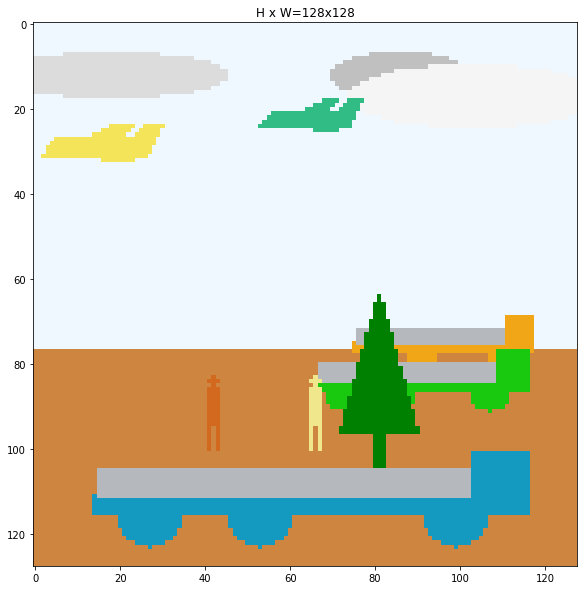

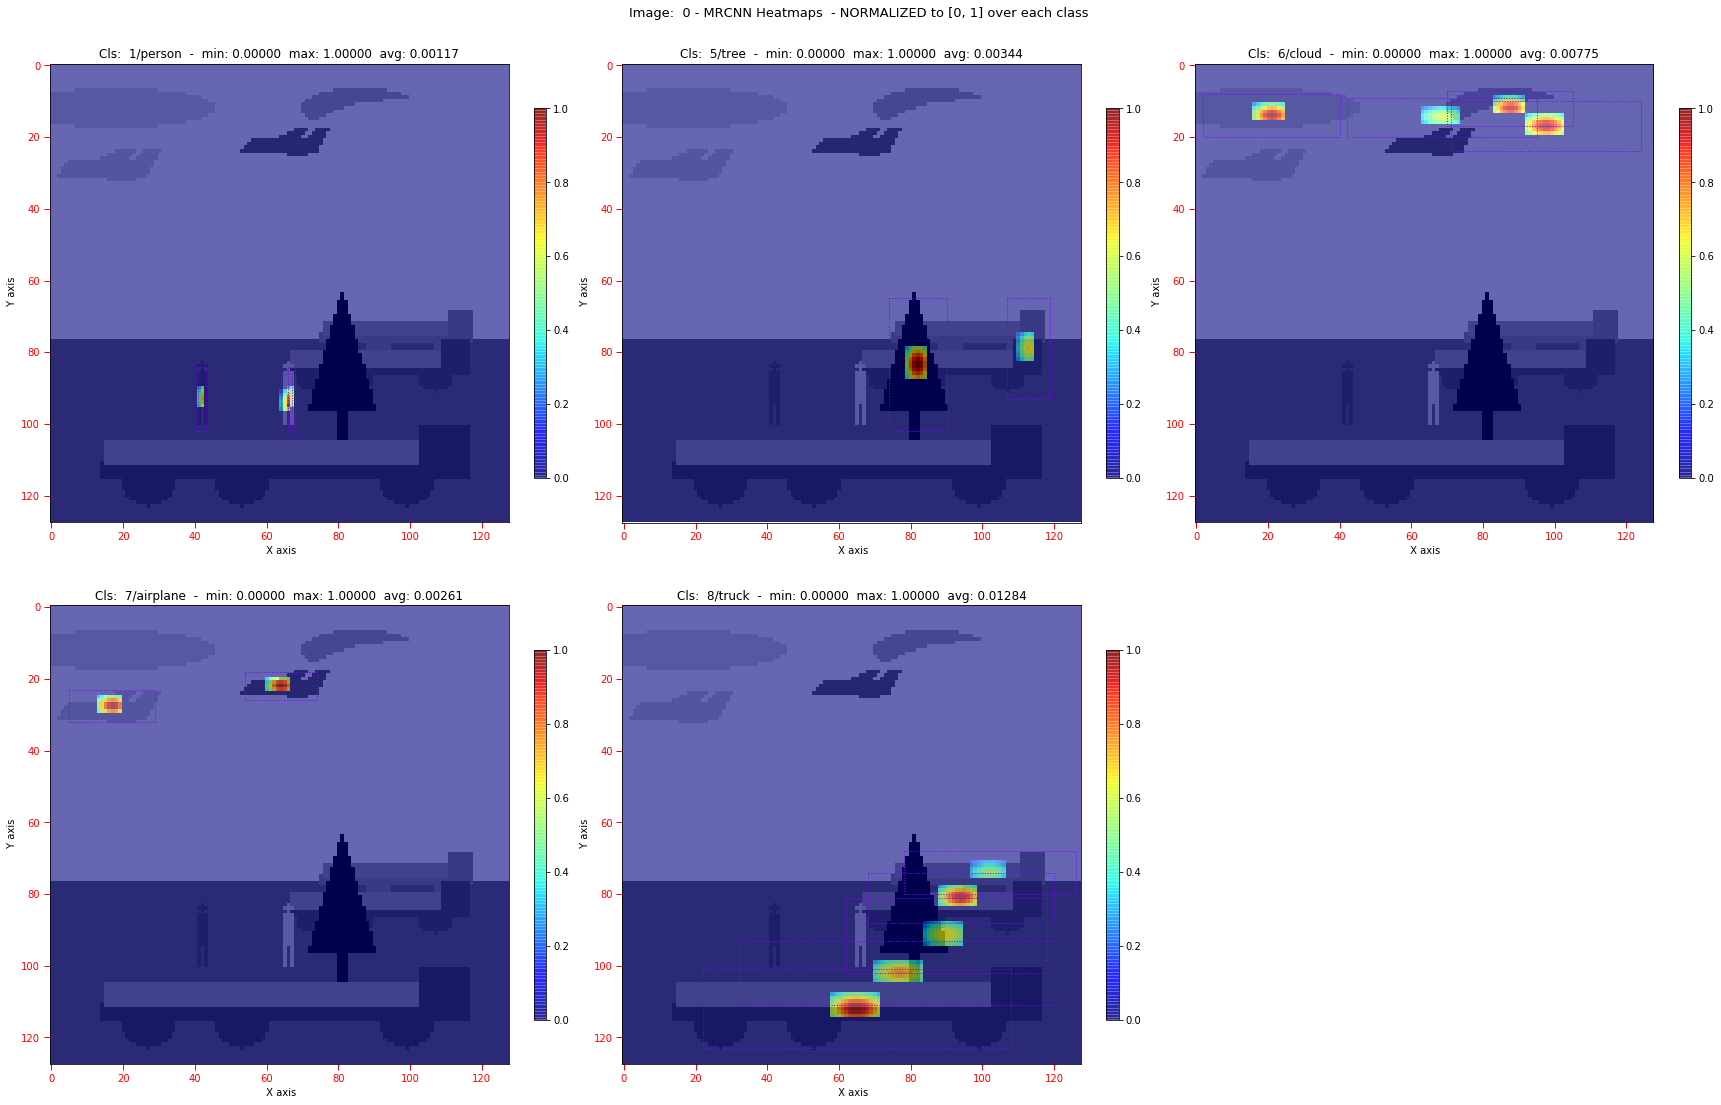

In [55]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'pr_hm' ,config = mrcnn_model.config, scaling = 'class') 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  
#                      config = mrcnn_config, class_ids = class_ids)

### Overlay image with fcn_heatmaps

class ids:  [1, 5, 6, 7, 8]
 Scaling options are:  'all', 'class'/'each' , or  'clip' 
 heatmap shape:  (128, 128, 9)  Bounding boxes shape:  (9, 64, 24)
Display classes: [1, 5, 6, 7, 8]


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


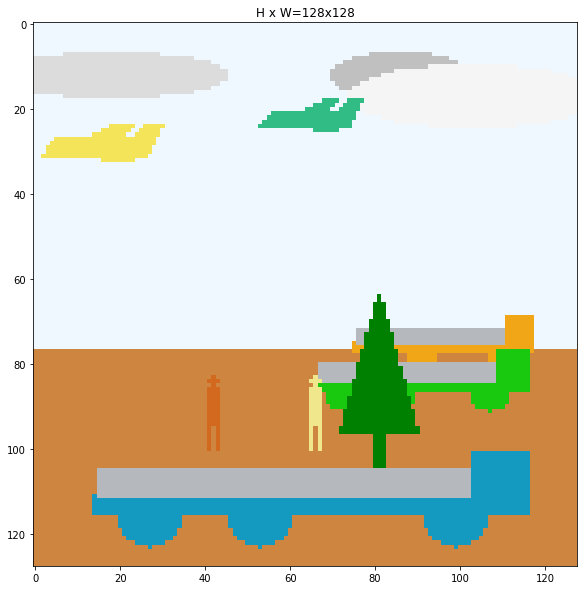

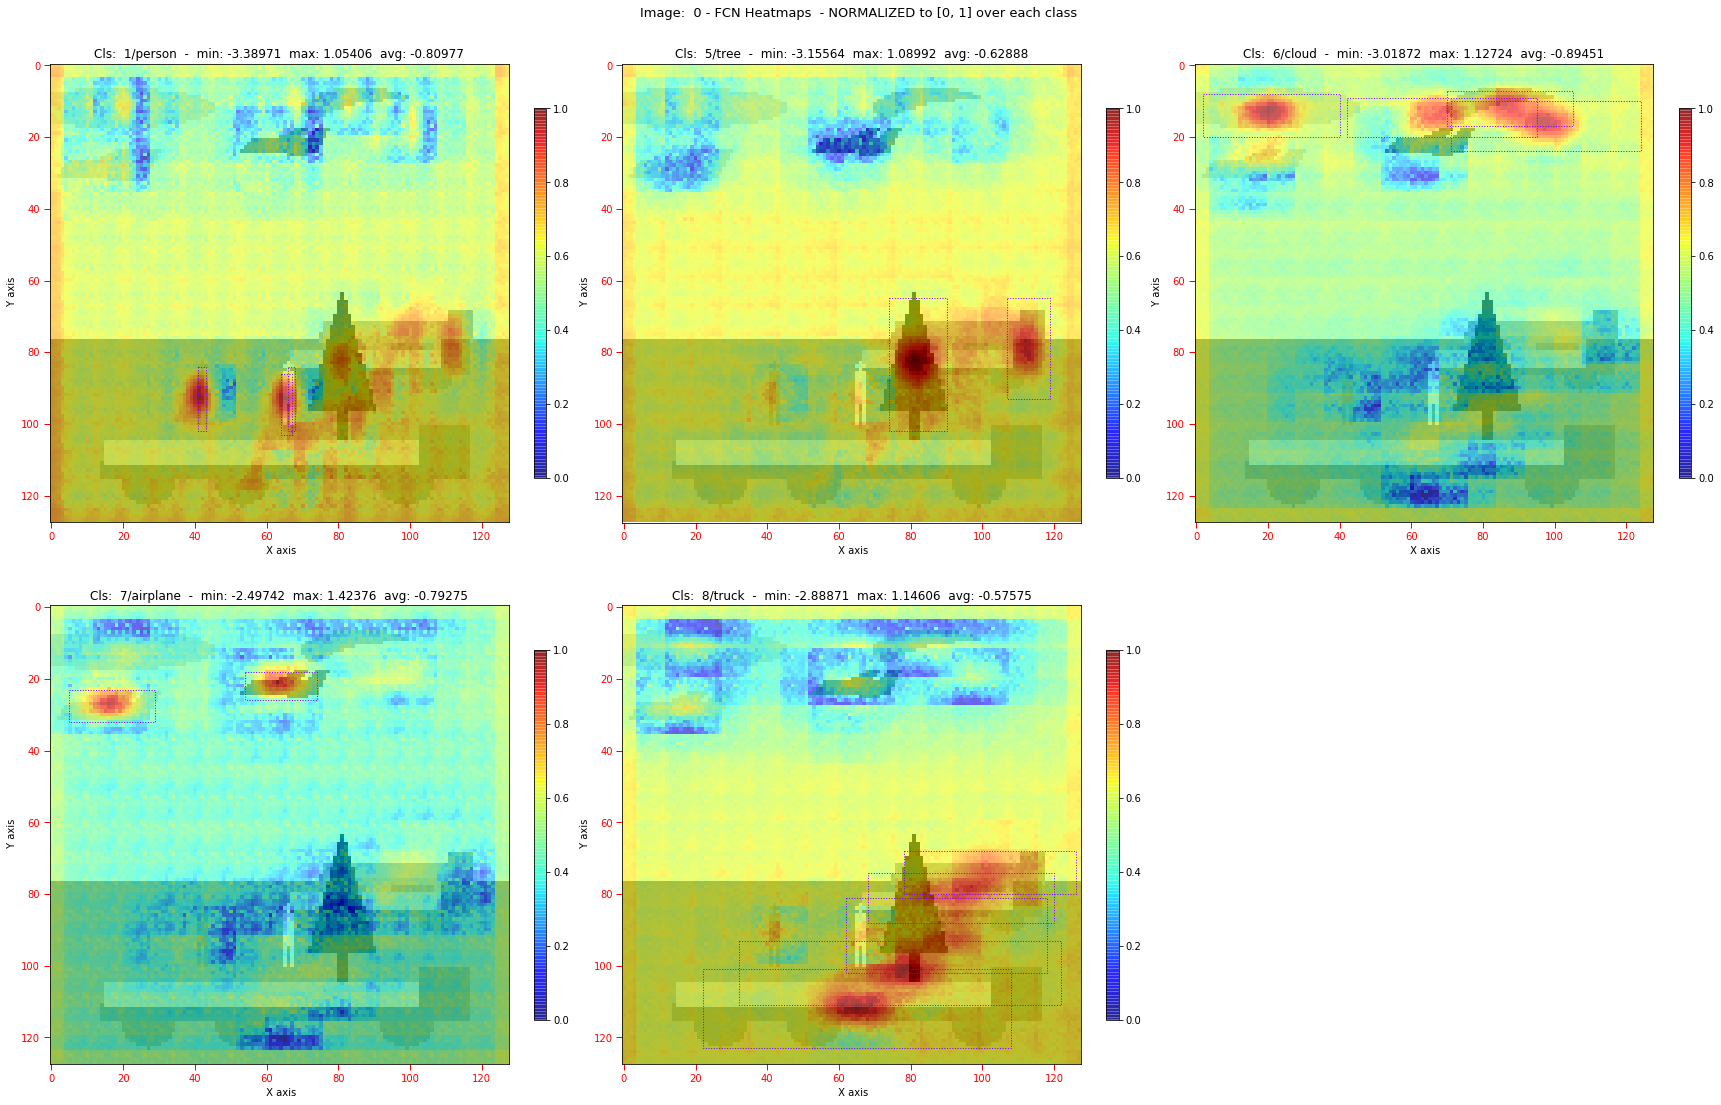

In [57]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'fcn_hm' ,config = mrcnn_model.config, scaling = 'class') 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  

### Overlay image with pr_heatmaps and fcn_heatmaps

 Scaling options are: 'all', 'class', 'each' , or  'clip' : 
 heatmap shape:  (128, 128, 9)
 Bounding boxes shape:  (9, 64, 24)
Image shape : (128, 128, 3)  class_ids: [         1          5          6          7          8]


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


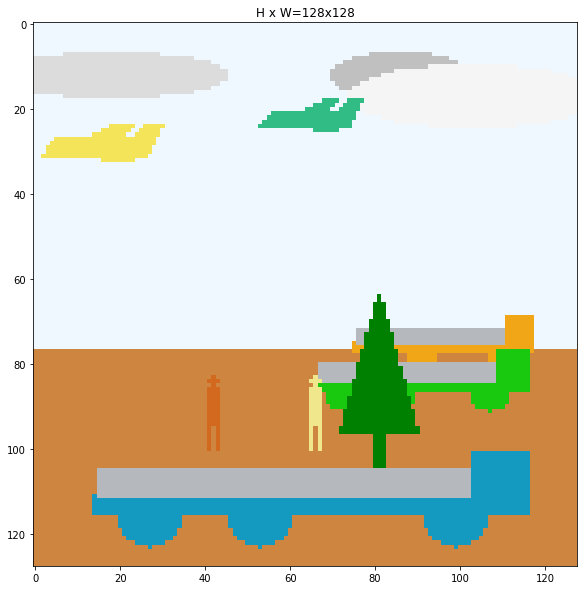

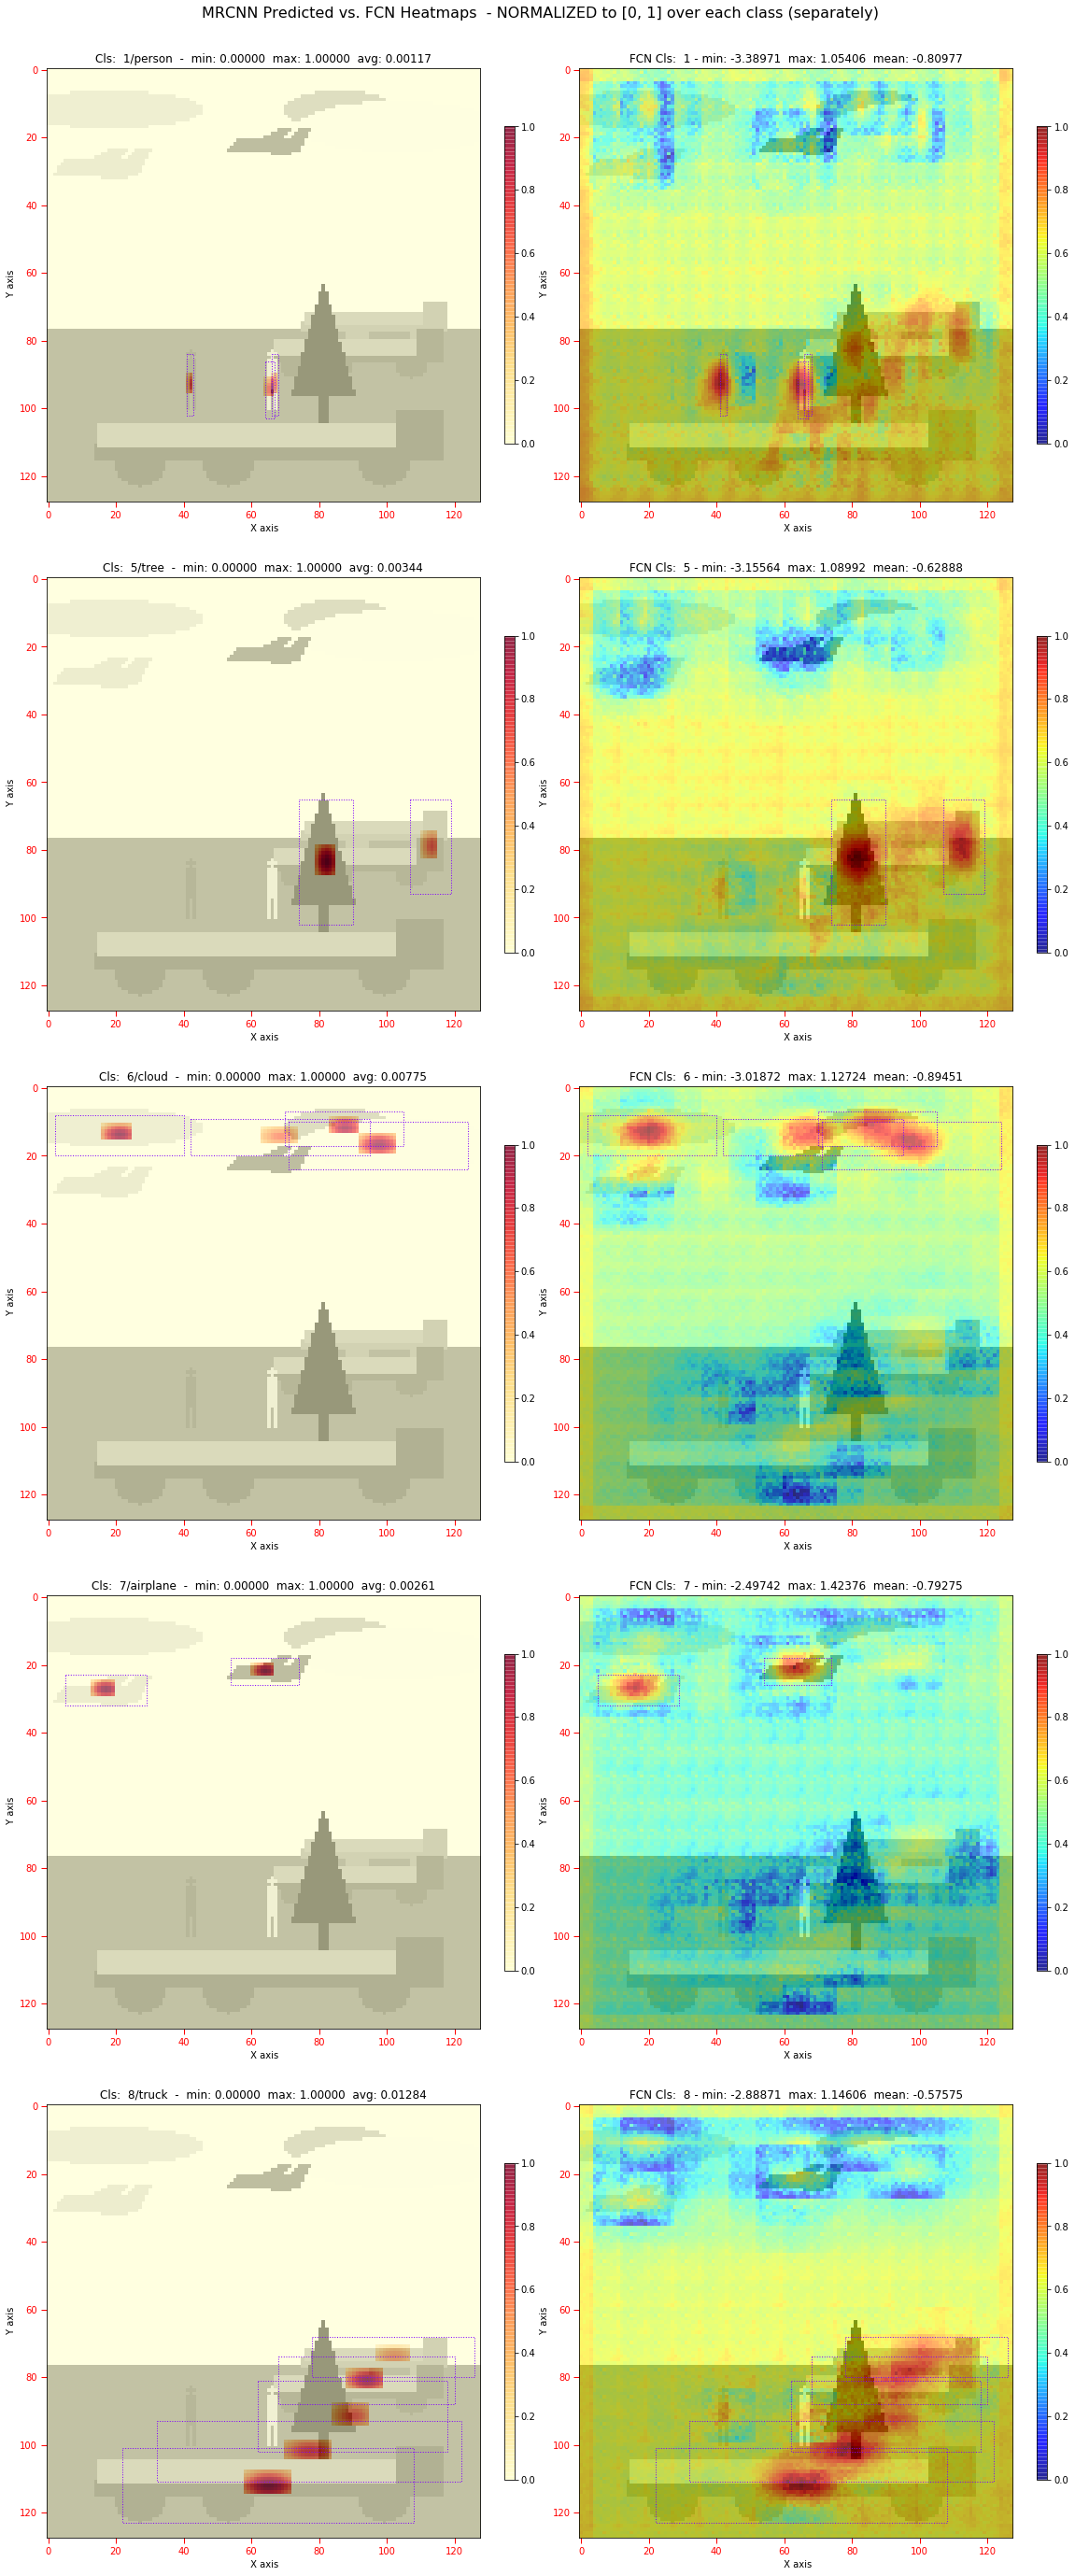

In [58]:
visualize.inference_heatmaps_compare(fcn_results, image_id = 0 , hm = 'fcn_hm', 
                     config = mrcnn_model.config, class_ids = pr_class_ids, class_names = coco_class_names, scaling = 'each')

##  3D Plots

####  3D plot of `fcn_heatmap` returned form model - classes predicted by MRCNN only 

1.4237583 -3.4835637
(128, 128, 9)
Image : 0  ClassIds: [1, 5, 6, 7, 8]
 Scaling options are 'all', 'class', or 'clip'/ None 
Display classes: [1, 5, 6, 7, 8]
rows   3  columns : 2
3
 min_z_all shape: ()  min_z_all: -3.4835637  max_z_all: () max_z_all: 1.4237583
 min_z_cls shape: (1, 1, 9)  max_z_cls shape: (1, 1, 9)
 SCALING == none 
1 zlim = each  zlim_min : -3.38971305 zlim_max: 1.05405784 
1 zlim = each  zlim_min : -3.15563846 zlim_max: 1.08992398 
1 zlim = each  zlim_min : -3.01871586 zlim_max: 1.12723649 
1 zlim = each  zlim_min : -2.49742389 zlim_max: 1.42375827 
1 zlim = each  zlim_min : -2.88870811 zlim_max: 1.14606047 


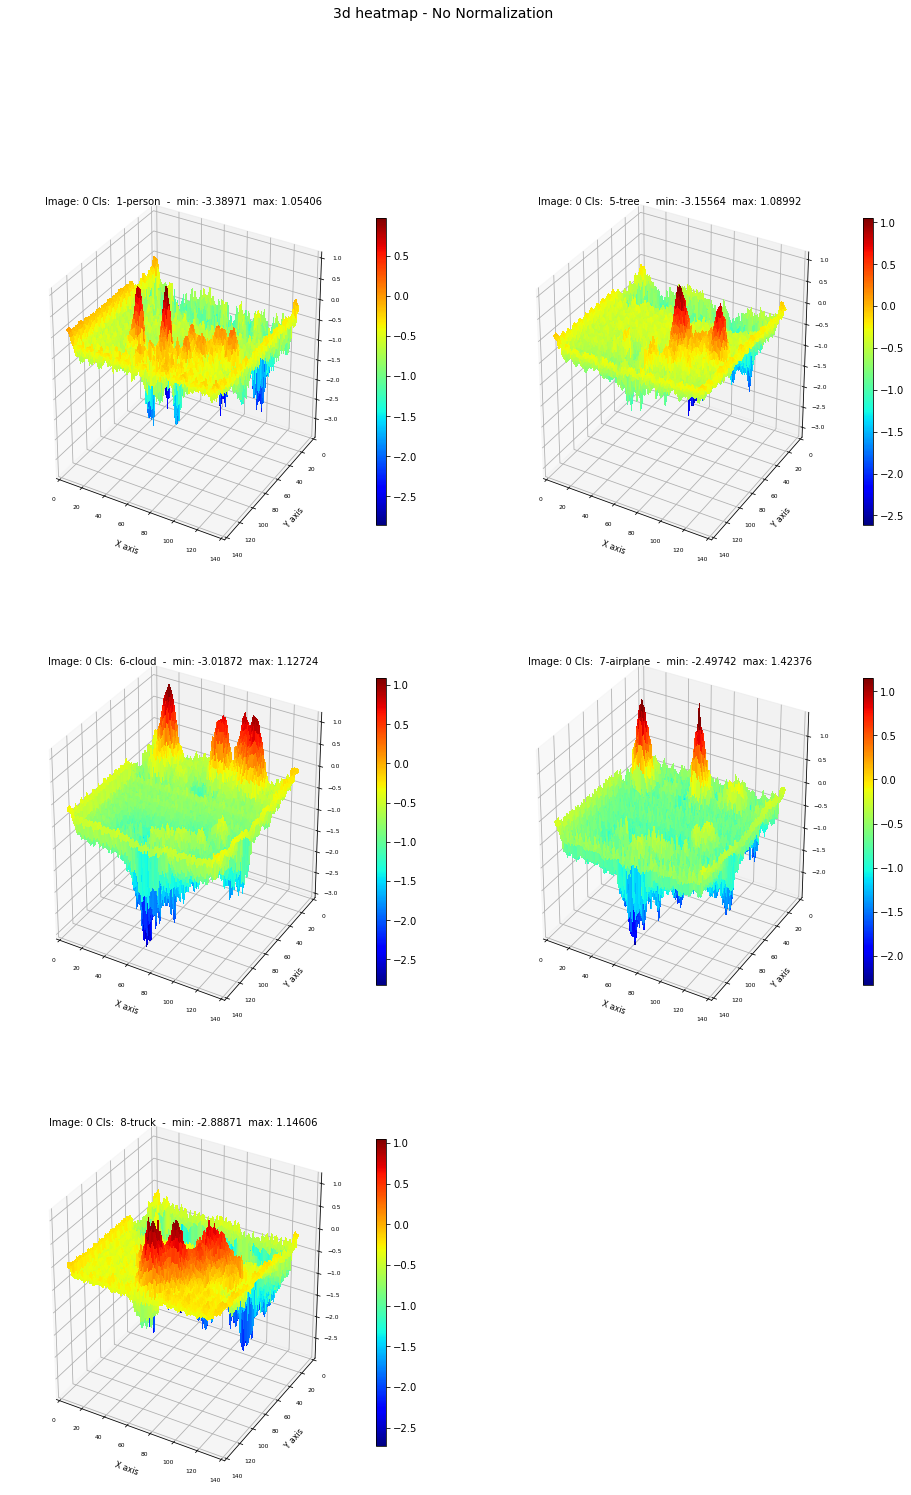

In [62]:
print(np.max(f['fcn_hm']), np.min(f['fcn_hm']))
print(f['fcn_hm'].shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('Image : {}  ClassIds: {}'.format(0, class_ids))
plot_3d_heatmap(f['fcn_hm'], 0, class_ids,class_names = coco_class_names, scaling = 'none')

####  3D plot of `fcn_softmax` returned form model - only classes in pred_scores

(128, 128, 9)
Image : 0  ClassIds: [1, 5, 6, 7, 8]
 Scaling options are 'all', 'class', or 'clip'/ None 
Display classes: [1, 5, 6, 7, 8]
rows   3  columns : 2
3
 min_z_all shape: ()  min_z_all: -3.4835637  max_z_all: () max_z_all: 1.4237583
 min_z_cls shape: (1, 1, 9)  max_z_cls shape: (1, 1, 9)
 SCALING == class
zlim = class(== all)   zlim_min : -3.48356366 zlim_max: 1.42375827 


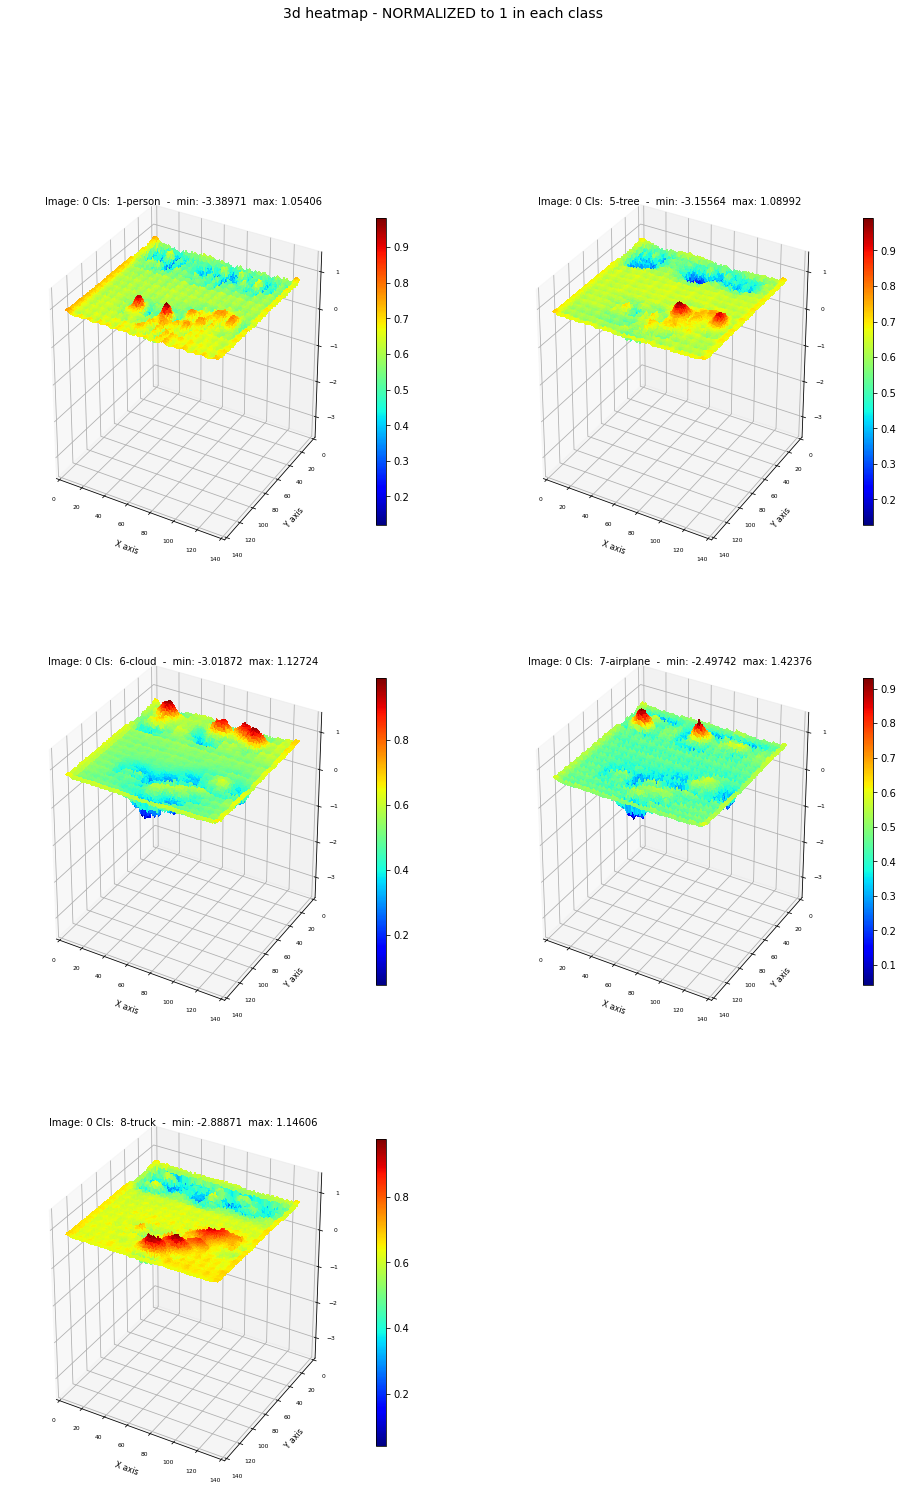

In [66]:
print(f['fcn_hm'].shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
plot_3d_heatmap(f['fcn_sm'], 0, class_ids,class_names = class_names, scaling = 'class')

## 2D heatmaps

###  `pr_hm`

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (128, 128, 9)  boxes:  (9, 64, 24)
 Image Id:  0  Display classes: [         1          5          6          7          8]
 rows   2  columns : 3 boxes.shape :  (9, 64, 24)
 min_z_all shape: ()  min_z_all: 0.0  max_z_all: () max_z_all: 1.0
 min_z_cls shape: (1, 1, 9)  max_z_cls shape: (1, 1, 9)
 SCALING == none 


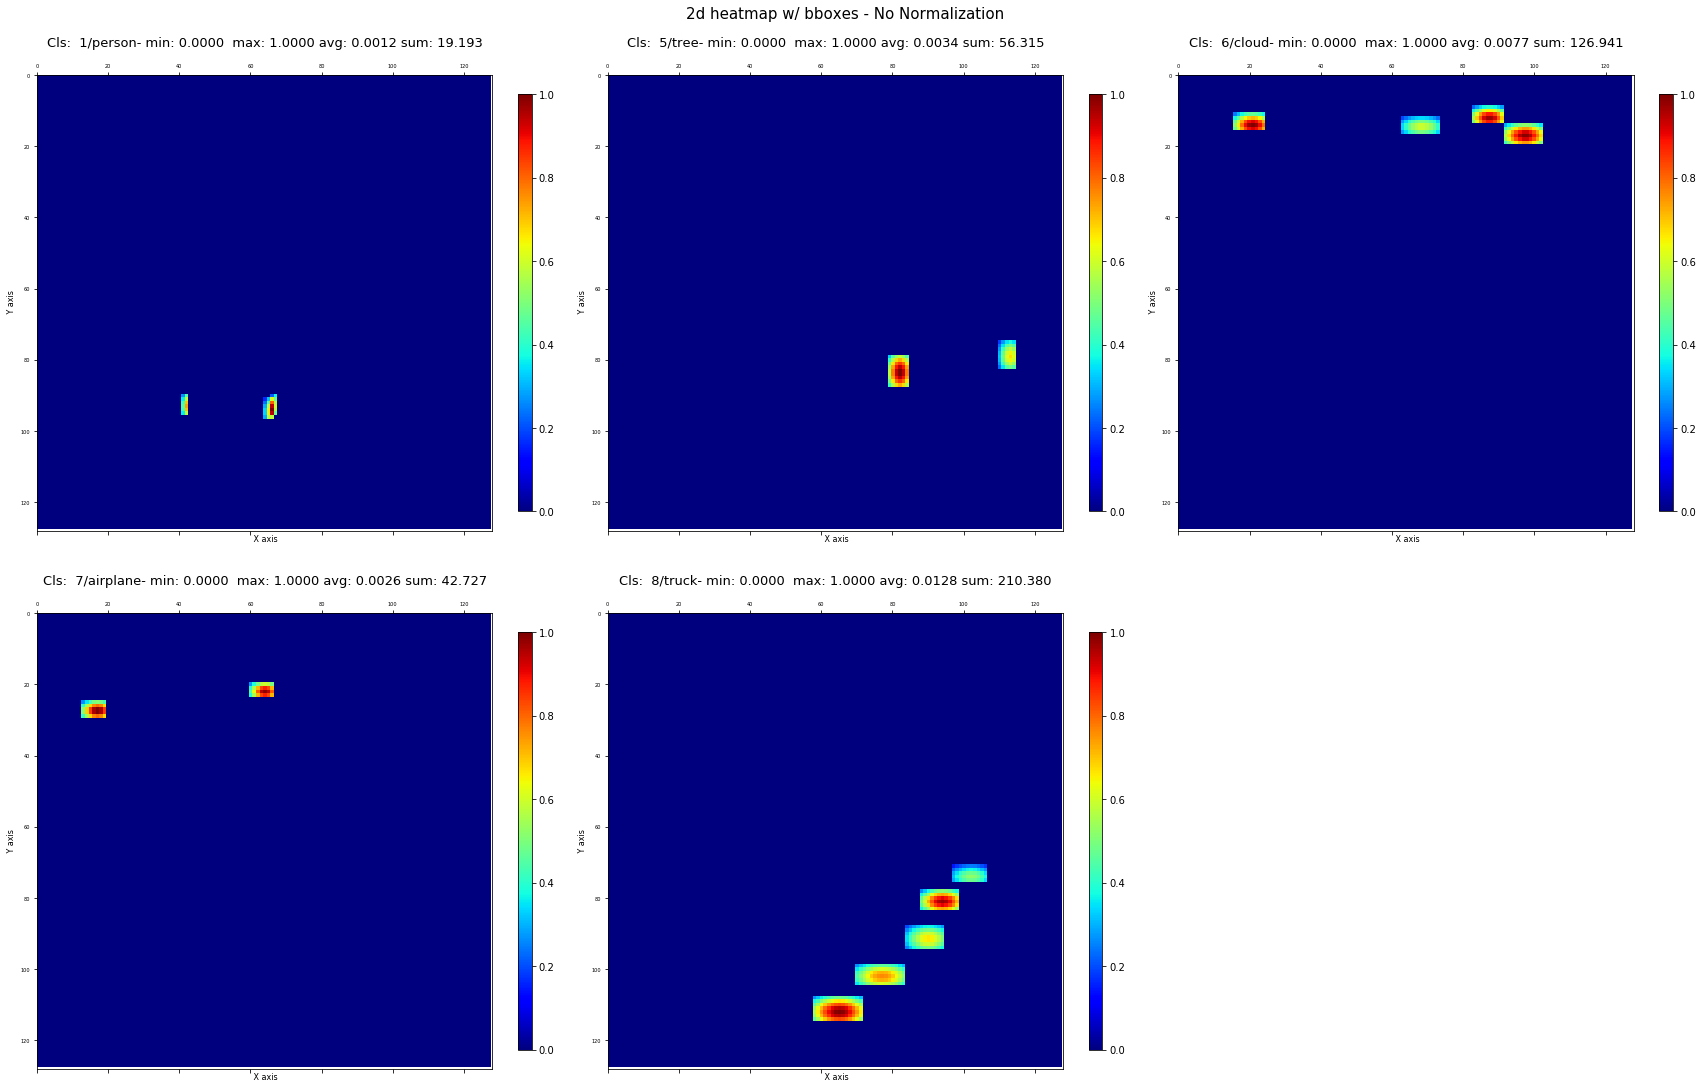

In [69]:
img_id = 0
 
pr_class_ids = np.unique(f['class_ids'])
fig = visualize.plot_2d_heatmap(f['pr_hm'], f['pr_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = class_names, scale = 1, scaling = 'none', size = (8,8))

### `fcn_hm`

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (128, 128, 9)  boxes:  (9, 64, 24)
 Image Id:  0  Display classes: [         1          5          6          7          8]
 rows   2  columns : 3 boxes.shape :  (9, 64, 24)
 min_z_all shape: ()  min_z_all: -3.4835637  max_z_all: () max_z_all: 1.4237583
 min_z_cls shape: (1, 1, 9)  max_z_cls shape: (1, 1, 9)
 SCALING == none 


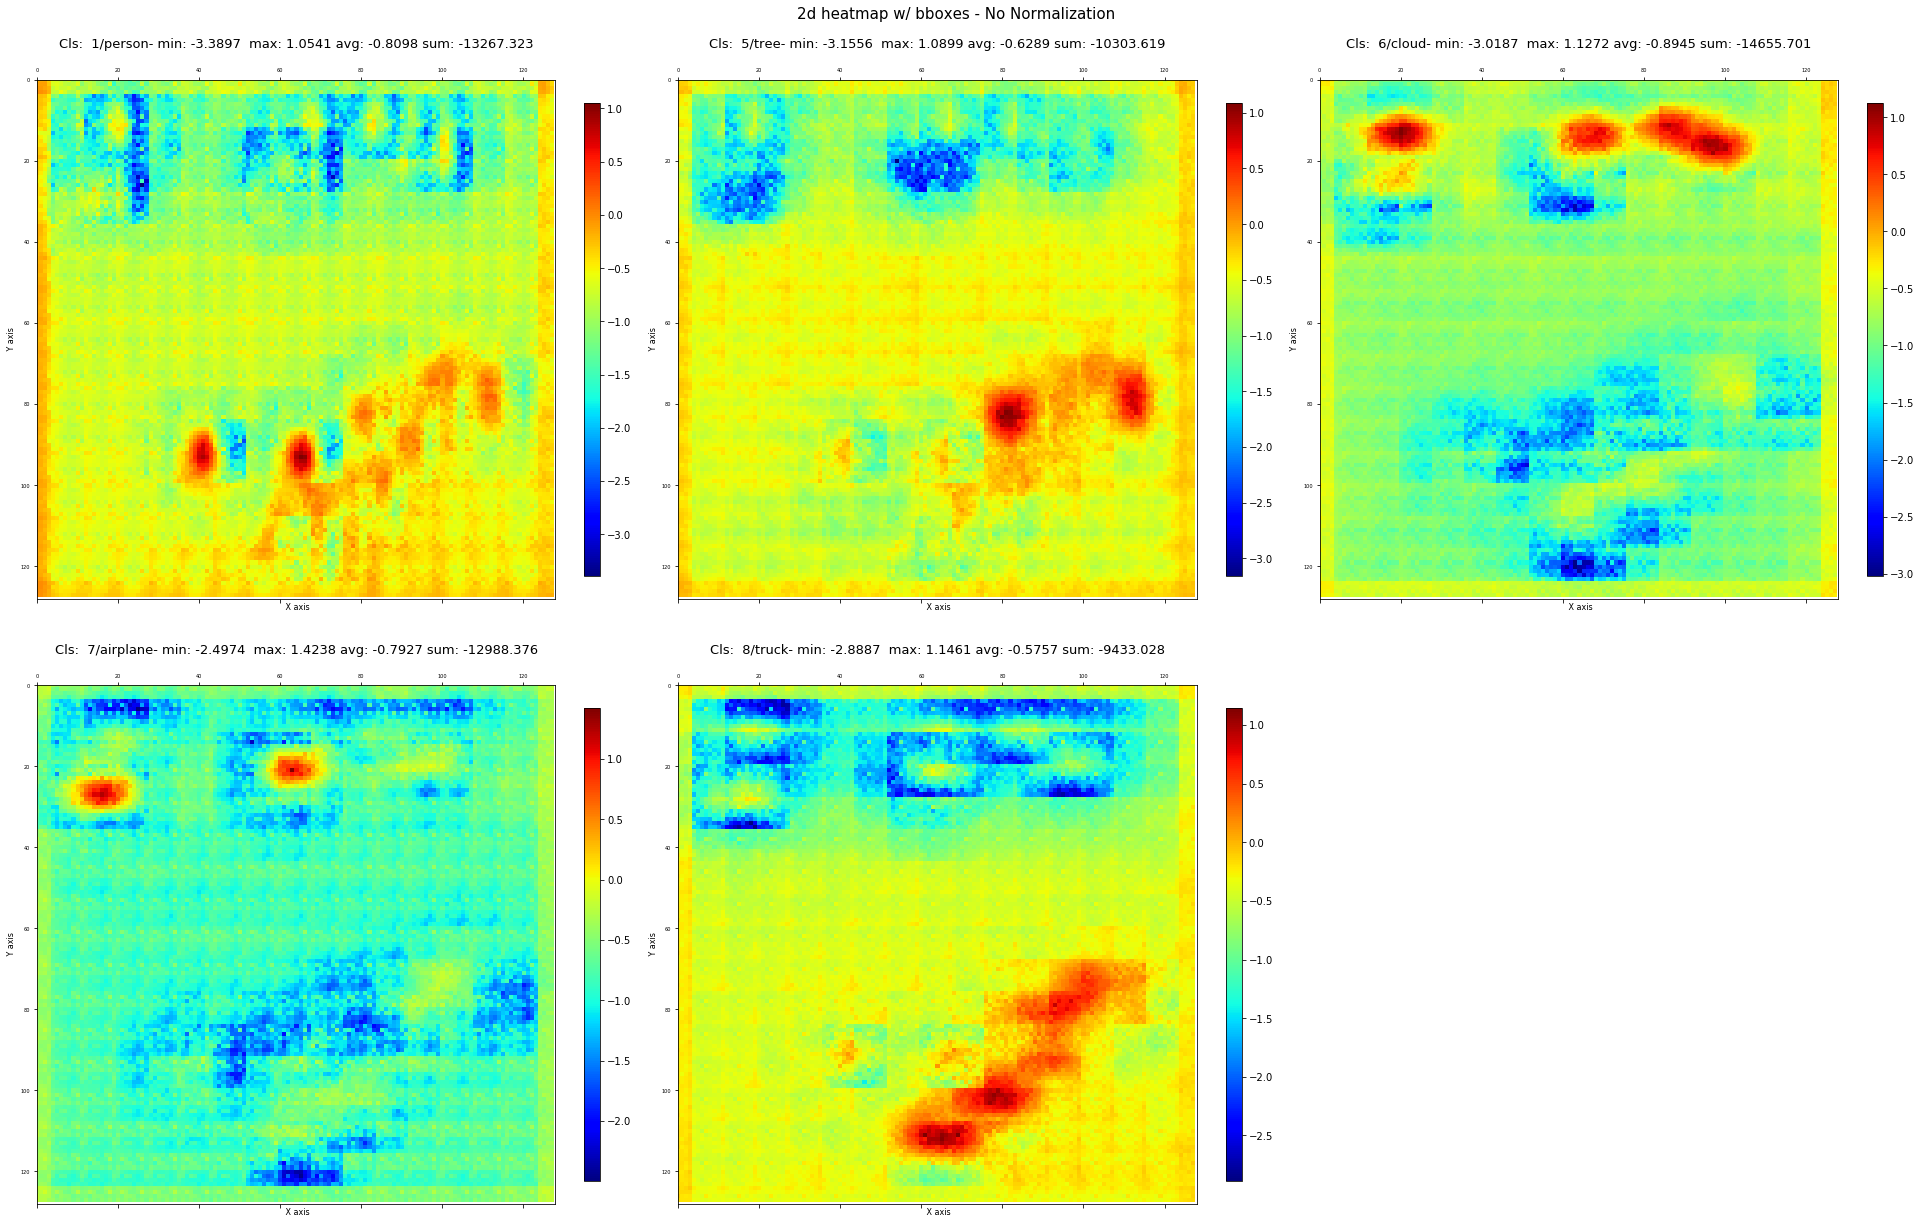

In [70]:
img_id = 0
 
pr_class_ids = np.unique(f['class_ids'])
fig = visualize.plot_2d_heatmap(f['fcn_hm'], f['fcn_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = class_names, scale = 1, scaling = 'none')

# Run Object Detection on sample images

###  Test on loaded image

### Test on a random image from images folder

In [ ]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
%matplotlib inline
import random, os
import skimage.io
import matplotlib.pyplot as plt
IMAGE_DIR = 'E:/git_projs/mrcnn3/images'
# IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(11,11))
plt.imshow(image)

In [ ]:
# Run detection
# results = mrcnn_model.detect([image], verbose=1)
results = fcn_model.detect_from_images(mrcnn_model, [image], verbose=1)

In [ ]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

# Evaluation of mAP  over a number of images

In [8]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries
np_format = {}
np_format['float']  = lambda x: "%10.4f" % x
np_format['int']    = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [22]:
save_path = "E:\\git_projs\\MRCNN3\\train_newshapes\\test_results"
save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/BCE_test_results"
AP_results_file= 'test_AP_results_2019_03_29'
All_APResults = {}

### Load previously saved AP Results from file

In [31]:
path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
prev_AP_results_file= 'test_AP_results_2019_01_14'
with open(os.path.join(path, prev_AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)
All_APResults = APRes

# print('/'.join(weights_file.split('/')[-3:]))
print(len(All_APResults.keys()))
for i in sorted(All_APResults):
    print(i, All_APResults[i]['Epochs'])

print(AP_results_file)

### Load weight file

In [23]:
# DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization

# files   = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#            'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#            'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#            'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#            'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

# DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
# files  = ['fcn_0001.h5', 'fcn_0003.h5', 'fcn_0005.h5', 'fcn_0009.h5', 
#           'fcn_0012.h5', 'fcn_0020.h5', 'fcn_0023.h5', 'fcn_0027.h5', 
#           'fcn_0033.h5', 'fcn_0047.h5', 'fcn_0070.h5', 'fcn_0080.h5', 
#           'fcn_0101.h5', 'fcn_0106.h5', 'fcn_0112.h5', 'fcn_0124.h5', 
#           'fcn_0138.h5', 'fcn_0144.h5', 'fcn_0161.h5', 'fcn_0171.h5', 'fcn_0181.h5']


FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
          'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
          'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
          'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
          'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
          'fcn_0077.h5', 'fcn_0089.h5']

# FILE_IDX = 3
# weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
# print("Loading weights ", weights_file)
# fcn_model.load_model_weights(weights_file)

### Run `compute_ap` over images

In [1]:
import mrcnn.calculate_map as cmap

for FILE_IDX in [0]:
    weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
    print("Loading weights ", weights_file)
    fcn_model.load_model_weights(weights_file)

    ###  Initialize data structures 
    orig_score = 5
    norm_score = 8
    alt_scr_0  = 11
    alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
    alt_scr_2  = 20
    IMGS       = 500
    # shuffled_image_ids = np.copy(dataset_test.image_ids)
    # np.random.shuffle(shuffled_image_ids)
    # image_ids = np.random.choice(dataset_test.image_ids, 300)
    image_ids = dataset_test.image_ids[:IMGS]
    print(len(image_ids))
    
    class_dict = []
    gt_dict = {}
    pr_dict = {}

    for a,b in zip(dataset_test.class_ids, dataset_test.class_names):
        class_dict.append({'id'   : int(a),
                            'name' : b,
                            'scores': [],
                            'bboxes': [],
                            'mrcnn_score_orig' : [],
                            'mrcnn_score_norm' : [], 
                            'mrcnn_score_0' : [],
                            'mrcnn_score_1' : [],
                            'mrcnn_score_2' : [],
                            'fcn_score_0' : [],
                            'fcn_score_1' : [],
                            'fcn_score_2' : [],      
                            'mrcnn_score_1_norm': [],
                            'mrcnn_score_2_norm': [],                           
                            'fcn_score_1_norm'  : [],
                            'fcn_score_2_norm'  : []                           
                          })

    # Compute VOC-Style mAP @ IoU=0.5
    # Running on 10 images. Increase for better accuracy.
 

    MRCNN_AP_Orig = []
    MRCNN_AP_0 = [] 
    MRCNN_AP_1 = [] 
    MRCNN_AP_2 = []
    FCN_AP_0   = []
    FCN_AP_1   = []
    FCN_AP_2   = []

    for image_id in image_ids:
        # Load image and ground truth data
        print('==> Calculate AP for image_id : ', image_id)
        # Run object detection
        fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = 0)  
    
        gt_dict, pr_dict, class_dict = cmap.update_map_dictionaries(fcn_results, gt_dict,pr_dict, class_dict)

        r = fcn_results[0] 

        #   Compute  AP, precisions, recalls, overlaps
        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,orig_score])
        MRCNN_AP_Orig.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_0])
        MRCNN_AP_0.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_0])
        FCN_AP_0.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_1])
        MRCNN_AP_1.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_1])
        FCN_AP_1.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_2])
        MRCNN_AP_2.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_2])
        FCN_AP_2.append(AP)

    print('complete')

    # mrcnn_model.class_pred_stats

    epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
    print('AP Calcs complete for epoch:', epochs , ' Weight file:', weights_file)

    APResult = {}
    APResult['Filename']      =  weights_file  
    APResult['Epochs']        =  epochs
    APResult['MRCNN_AP_Orig'] =  MRCNN_AP_Orig
    APResult['MRCNN_AP_0'   ] =  MRCNN_AP_0   
    APResult['MRCNN_AP_1'   ] =  MRCNN_AP_1   
    APResult['MRCNN_AP_2'   ] =  MRCNN_AP_2   
    APResult['FCN_AP_0'     ] =  FCN_AP_0     
    APResult['FCN_AP_1'     ] =  FCN_AP_1     
    APResult['FCN_AP_2'     ] =  FCN_AP_2     
    All_APResults[weights_file] = APResult

ImportError: No module named 'mrcnn'

In [24]:
    print(len(All_APResults.keys()))
    for i in sorted(All_APResults):
        print(i, All_APResults[i]['Epochs'])

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5 
FCN  MODEL Load weight file COMPLETE 
500
==> Calculate AP for image_id :  0
==> Calculate AP for image_id :  1
==> Calculate AP for image_id :  2
==> Calculate AP for image_id :  3
==> Calculate AP for image_id :  4
==> Calculate AP for image_id :  5
==> Calculate AP for image_id :  6
==> Calculate AP for image_id :  7
==> Calculate AP for image_id :  8
==> Calculate AP for image_id :  9
==> Calculate AP for image_id :  10
==> Calculate AP for image_i

==> Calculate AP for image_id :  207
==> Calculate AP for image_id :  208
==> Calculate AP for image_id :  209
==> Calculate AP for image_id :  210
==> Calculate AP for image_id :  211
==> Calculate AP for image_id :  212
==> Calculate AP for image_id :  213
==> Calculate AP for image_id :  214
==> Calculate AP for image_id :  215
==> Calculate AP for image_id :  216
==> Calculate AP for image_id :  217
==> Calculate AP for image_id :  218
==> Calculate AP for image_id :  219
==> Calculate AP for image_id :  220
==> Calculate AP for image_id :  221
==> Calculate AP for image_id :  222
==> Calculate AP for image_id :  223
==> Calculate AP for image_id :  224
==> Calculate AP for image_id :  225
==> Calculate AP for image_id :  226
==> Calculate AP for image_id :  227
==> Calculate AP for image_id :  228
==> Calculate AP for image_id :  229
==> Calculate AP for image_id :  230
==> Calculate AP for image_id :  231
==> Calculate AP for image_id :  232
==> Calculate AP for image_id :  233
=

==> Calculate AP for image_id :  429
==> Calculate AP for image_id :  430
==> Calculate AP for image_id :  431
==> Calculate AP for image_id :  432
==> Calculate AP for image_id :  433
==> Calculate AP for image_id :  434
==> Calculate AP for image_id :  435
==> Calculate AP for image_id :  436
==> Calculate AP for image_id :  437
==> Calculate AP for image_id :  438
==> Calculate AP for image_id :  439
==> Calculate AP for image_id :  440
==> Calculate AP for image_id :  441
==> Calculate AP for image_id :  442
==> Calculate AP for image_id :  443
==> Calculate AP for image_id :  444
==> Calculate AP for image_id :  445
==> Calculate AP for image_id :  446
==> Calculate AP for image_id :  447
==> Calculate AP for image_id :  448
==> Calculate AP for image_id :  449
==> Calculate AP for image_id :  450
==> Calculate AP for image_id :  451
==> Calculate AP for image_id :  452
==> Calculate AP for image_id :  453
==> Calculate AP for image_id :  454
==> Calculate AP for image_id :  455
=

==> Calculate AP for image_id :  130
==> Calculate AP for image_id :  131
==> Calculate AP for image_id :  132
==> Calculate AP for image_id :  133
==> Calculate AP for image_id :  134
==> Calculate AP for image_id :  135
==> Calculate AP for image_id :  136
==> Calculate AP for image_id :  137
==> Calculate AP for image_id :  138
==> Calculate AP for image_id :  139
==> Calculate AP for image_id :  140
==> Calculate AP for image_id :  141
==> Calculate AP for image_id :  142
==> Calculate AP for image_id :  143
==> Calculate AP for image_id :  144
==> Calculate AP for image_id :  145
==> Calculate AP for image_id :  146
==> Calculate AP for image_id :  147
==> Calculate AP for image_id :  148
==> Calculate AP for image_id :  149
==> Calculate AP for image_id :  150
==> Calculate AP for image_id :  151
==> Calculate AP for image_id :  152
==> Calculate AP for image_id :  153
==> Calculate AP for image_id :  154
==> Calculate AP for image_id :  155
==> Calculate AP for image_id :  156
=

==> Calculate AP for image_id :  352
==> Calculate AP for image_id :  353
==> Calculate AP for image_id :  354
==> Calculate AP for image_id :  355
==> Calculate AP for image_id :  356
==> Calculate AP for image_id :  357
==> Calculate AP for image_id :  358
==> Calculate AP for image_id :  359
==> Calculate AP for image_id :  360
==> Calculate AP for image_id :  361
==> Calculate AP for image_id :  362
==> Calculate AP for image_id :  363
==> Calculate AP for image_id :  364
==> Calculate AP for image_id :  365
==> Calculate AP for image_id :  366
==> Calculate AP for image_id :  367
==> Calculate AP for image_id :  368
==> Calculate AP for image_id :  369
==> Calculate AP for image_id :  370
==> Calculate AP for image_id :  371
==> Calculate AP for image_id :  372
==> Calculate AP for image_id :  373
==> Calculate AP for image_id :  374
==> Calculate AP for image_id :  375
==> Calculate AP for image_id :  376
==> Calculate AP for image_id :  377
==> Calculate AP for image_id :  378
=

In [25]:
    #### Save AP_Results
    ####------------------------------------------------------------------------
    print(save_path,'  ', AP_results_file)

    with open(os.path.join(save_path, AP_results_file+'.pkl'), 'wb') as outfile:
        pickle.dump(All_APResults, outfile)
    print('Saved AP_results for epoch:',  All_APResults[i]['Epochs'], ' Weight file:', i)

/home/kbardool/git_projs/mrcnn3/train_newshapes_2/BCE_test_results    test_AP_results_2019_03_29
Saved AP_results for epoch: 0002  Weight file: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0002.h5


In [26]:
    #### Save Cls_info, pr_bboxes dictionaries
    ####------------------------------------------------------------------------
    cls_info_file = 'test_cls_info_epoch'+epochs+'_'+str(len(image_ids))
    pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_'+str(len(image_ids))
    gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_'+str(len(image_ids))
    print('Save to :', cls_info_file,' -- ', pr_boxes_file,' -- ', gt_boxes_file)

Save to : test_cls_info_epoch0002_500  --  test_pr_bboxes_epoch0002_500  --  test_gt_bboxes_epoch0002_500


In [27]:
    with open(os.path.join(save_path, cls_info_file+'.pkl'), 'wb') as outfile:
        pickle.dump(class_dict, outfile)
    with open(os.path.join(save_path, gt_boxes_file+'.pkl'), 'wb') as outfile:
        pickle.dump(gt_dict, outfile)
    with open(os.path.join(save_path, pr_boxes_file+'.pkl'), 'wb') as outfile:
        pickle.dump(pr_dict, outfile)    
    print('Saves complete')   

Saves complete


In [4]:
# print(len(All_APResults.keys()))
# for i in sorted(All_APResults):
#     print(i, All_APResults[i]['Epochs'])

#### Display most recent AP_Results

In [29]:
####------------------------------------------------------------------------
np_format = {}
np_format['float'] = lambda x: "%10.4f" % x
np_format['int']   = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

# LIMIT = 10
# print(" {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
# for i in range(LIMIT):
#     print(" {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(
#         MRCNN_AP_Orig[i], MRCNN_AP_0[i], FCN_AP_0[i], MRCNN_AP_1[i], FCN_AP_1[i], MRCNN_AP_2[i], FCN_AP_2[i]))
# print()

epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
print()
print('After {} training epochs.\nWeight file: {}'.format(epochs, weights_file))
print()
print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
print('-'*116)

for LIMIT in [10,50,100,250,500]:
    print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, epochs,
            np.mean(MRCNN_AP_Orig[:LIMIT]), 
            np.mean(MRCNN_AP_0[:LIMIT]), np.mean(FCN_AP_0[:LIMIT]), 
            np.mean(MRCNN_AP_1[:LIMIT]), np.mean(FCN_AP_1[:LIMIT]), 
            np.mean(MRCNN_AP_2[:LIMIT]), np.mean(FCN_AP_2[:LIMIT]) ))        


After 0002 training epochs.
Weight file: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0002.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0002          0.87226       0.86673       0.80876       0.85436       0.81519       0.84267       0.82338
50        0002          0.86316       0.83385       0.78202       0.83025       0.79980       0.82540       0.80762
100       0002          0.85982       0.82792       0.77032       0.82391       0.78851       0.82031       0.79540
250       0002          0.87202       0.84037       0.78309       0.83422       0.80260       0.83198       0.81407
500       0002          0.87351       0.84199       0.78047       0.83802       0.80158       0.83603       0.81404


# Save / Load AP Results to file

### Save AP_Results

In [20]:
# path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
# AP_results_file= 'test_AP_results_2019_01_18'
# with open(os.path.join(save_path, AP_results_file+'.pkl'), 'wb') as outfile:
#     pickle.dump(All_APResults, outfile)

### Load AP_Results

In [3]:
# AP_results_file= 'test_AP_results_2019_01_17'
print(AP_results_file)

NameError: name 'AP_results_file' is not defined

In [30]:
try:
    del APRes 
except:
    pass

with open(os.path.join(save_path, AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)

print(len(APRes.keys()))
# pp.pprint(APRes.keys())
for i in sorted(APRes):
    print(i, APRes[i]['Epochs'])

2
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5 0001
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0002.h5 0002


### Display AP_Results

In [31]:
for key in sorted(APRes) :
    # print(' AP Result Entry :', key)
    print()
    print('After {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
    print()
    print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))
    print('\n')


After 0001 training epochs.
Weight file: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.87226       0.86673       0.82015       0.85436       0.81512       0.84267       0.80859
50        0001          0.86316       0.83385       0.77899       0.83025       0.78236       0.82540       0.78128
100       0001          0.85982       0.82792       0.76686       0.82391       0.76888       0.82031       0.76489
250       0001          0.87202       0.84037       0.77984       0.83422       0.78312       0.83198       0.78262
500       0001          0.87351       0.84199       0.78024       0.83802       0.78191       0.83603       0.78235



After 0002 training epochs.
Weight file: /home/kbardool/model

In [39]:
del APRes

In [2]:
# for key in sorted(APRes) :
#     # print(' AP Result Entry :', key)
#     print()
#     print('After {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
#     print()
#     print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
#     print('-'*116)
#     for LIMIT in [10,50,100,250,500]:
#         print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
#                 np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
#                 np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
#                 np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
#                 np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
#                 np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
#                 np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
#                 np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))
#     print('\n')

In [1]:
# print(" {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
# for i in range(len(MRCNN_AP_Orig)):
#     print(" {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(
#         MRCNN_AP_Orig[i], MRCNN_AP_0[i], FCN_AP_0[i], MRCNN_AP_1[i], FCN_AP_1[i], MRCNN_AP_2[i], FCN_AP_2[i]))
# print()

# print()
# print('Weight file used: {}   {}'.format(files[FILE_IDX], files[FILE_IDX].split('_')[1].rstrip('.h5')))
# print()
# print("{:<10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
# print('-'*108)
# print("{:<3d}-{:<7s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(len(image_ids),files[FILE_IDX].split('_')[1].rstrip('.h5'),
#         np.mean(MRCNN_AP_Orig), np.mean(MRCNN_AP_0), np.mean(FCN_AP_0), np.mean(MRCNN_AP_1), np.mean(FCN_AP_1), np.mean(MRCNN_AP_2), np.mean(FCN_AP_2)))        

### Save to file

In [19]:
cls_info_file = 'test_cls_info_epoch'+epochs+'_'+str(len(image_ids))
pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_'+str(len(image_ids))
gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_'+str(len(image_ids))
print(save_path)
print(cls_info_file,'   ', pr_boxes_file,'   ', gt_boxes_file)

E:\git_projs\MRCNN3\train_newshapes\training_results
test_cls_info_epoch0821_500     test_pr_bboxes_epoch0821_500     test_gt_bboxes_epoch0821_500


In [20]:
with open(os.path.join(save_path, cls_info_file+'.pkl'), 'wb') as outfile:
    pickle.dump(class_dict, outfile)
with open(os.path.join(save_path, gt_boxes_file+'.pkl'), 'wb') as outfile:
    pickle.dump(gt_dict, outfile)
with open(os.path.join(save_path, pr_boxes_file+'.pkl'), 'wb') as outfile:
    pickle.dump(pr_dict, outfile)    

# with open(os.path.join(save_path, cls_info_file+'.json'), 'w') as outfile:
#     json.dump(class_dict, outfile)
# with open(os.path.join(save_path, gt_boxes_file+'.json'), 'w') as outfile:
#     json.dump(gt_dict, outfile)
# with open(os.path.join(save_path, pr_boxes_file+'.json'), 'w') as outfile:
#     json.dump(pr_dict, outfile)    

# Load and display previously saved AP Results from file

In [5]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries
np_format = {}
np_format['float']  = lambda x: "%10.4f" % x
np_format['int']    = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [10]:
# save_path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
prev_AP_results_file= 'test_AP_results_2019_01_14'

load_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes/BCE3_test_results"
AP_results_file= 'test_AP_results_2019_02_14'

print(AP_results_file)

All_APResults = {}

In [14]:
with open(os.path.join(load_path, AP_results_file+'.pkl'), 'rb') as outfile:
    All_APResults = pickle.load(outfile)

# print('/'.join(weights_file.split('/')[-3:]))
print(len(All_APResults.keys()))
for i in sorted(All_APResults):
    print(i, All_APResults[i]['Epochs'])

21
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0001.h5 0001
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0003.h5 0003
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0005.h5 0005
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0009.h5 0009
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0012.h5 0012
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0020.h5 0020
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0023.h5 0023
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0027.h5 0027
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0033.h5 0033
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0047.h5 0047
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0070.h5 0070
/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0080.h5 0080
/

### Display AP_Results - Per Weight File

In [15]:
for key in sorted(All_APResults) :
    # print(' AP Result Entry :', key)
    print()
    print('After {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
    print()
    print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))
    print('\n')


After 0001 training epochs.
Weight file: /home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000/fcn_0001.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.87100       0.86736       0.86351       0.86513       0.88464       0.86513       0.88933
50        0001          0.90772       0.90190       0.89893       0.89750       0.91524       0.89750       0.91248
100       0001          0.89855       0.89165       0.89122       0.88946       0.90177       0.88730       0.90067
250       0001          0.90118       0.89748       0.89473       0.89526       0.90309       0.89442       0.90356
500       0001          0.90799       0.90404       0.89981       0.90244       0.90715       0.90198       0.90850



After 0003 training epochs.
Weight file: /home/kbardool/models_

### Display AP_Results - Per Weight File

In [21]:
LIMIT = 250
print('Scores over ', LIMIT, ' Images after different training epochs.')
print()
print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
print('-'*116)

for key in sorted(All_APResults) :
    # print(' AP Result Entry :', key)
    print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
            np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
            np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
            np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
            np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
            np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
            np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
            np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))


Scores over  250  Images after different training epochs.

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
250       0001          0.90118       0.89748       0.89473       0.89526       0.90309       0.89442       0.90356
250       0003          0.90118       0.89748       0.89701       0.89526       0.89535       0.89442       0.87522
250       0005          0.90118       0.89748       0.88863       0.89526       0.88806       0.89442       0.87587
250       0009          0.90118       0.89748       0.89022       0.89526       0.89208       0.89442       0.88372
250       0012          0.90118       0.89748       0.89412       0.89526       0.88781       0.89442       0.88623
250       0020          0.90118       0.89748       0.88313       0.89526       0.87669       0.89442       0.88060
250       00

# Update Map Dictionaries

In [9]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries
np_format = { 'float'  : lambda x: "{:>10.4f}".format(x) , 
              'int'    : lambda x: "%>10d" % x
            }
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [10]:
# class_dict = []
# gt_dict = {}
# pr_dict = {}

# for a,b in zip(dataset_test.class_ids, dataset_test.class_names):
#     class_dict.append({'id'   : int(a),
#                          'name' : b,
#                          'scores': [],
#                          'bboxes': [],
#                          'mrcnn_score_orig' : [],
#                          'mrcnn_score_norm' : [], 
#                          'mrcnn_score_0' : [],
#                          'mrcnn_score_1' : [],
#                          'mrcnn_score_2' : [],
#                          'fcn_score_0' : [],
#                          'fcn_score_1' : [],
#                          'fcn_score_2' : [],                      
#                       })

fix_class_dict = []
fix_gt_dict = {}
fix_pr_dict = {}

for a,b in zip(dataset_test.class_ids, dataset_test.class_names):
    fix_class_dict.append({'id'              : int(a),
                          'name'              : b,
                          'scores'            : [],
                          'bboxes'            : [],
                          'mrcnn_score_orig'  : [],
                          'mrcnn_score_norm'  : [], 
                          'mrcnn_score_0'     : [],
                          'mrcnn_score_1'     : [],
                          'mrcnn_score_2'     : [],
                          'fcn_score_0'       : [],
                          'fcn_score_1'       : [],
                          'fcn_score_2'       : [],  
                          'mrcnn_score_1_norm': [],
                          'mrcnn_score_2_norm': [],                           
                          'fcn_score_1_norm'  : [],
                          'fcn_score_2_norm'  : [],  
                           
                      })


In [19]:
fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, 357, verbose = 1)  

Image Id  : 357     External Id: shapes.357     Image Reference: 
[ ('sun', (138, 235, 31), (91, 7, 4, 4)),
  ('building', (248, 142, 65), (51, 50, 11, 13)),
  ('building', (57, 117, 97), (74, 70, 16, 23)),
  ('tree', (210, 29, 209), (41, 70, 14, 14)),
  ('tree', (155, 184, 113), (42, 101, 22, 22))]
===>   fcn.detect_from_images() 
===>  mrcnn_model.detect()
Processing 1 images
image                    shape: (128, 128, 3)         min:   29.00000  max:  248.00000
molded_images            shape: (1, 128, 128, 3)      min:  -87.80000  max:  124.30000
image_metas              shape: (1, 15)               min:    0.00000  max:  128.00000
===>  call mrcnn_model.predict()
===> return from  mrcnn_model.predict()
     detections        :  (1, 64, 7)
     rpn_roi_proposals :  (1, 1000, 4)
     mrcnn_class       :  (1, 1000, 7)
     mrcnn_bbox        :  (1, 1000, 7, 4)
     pr_hm             :  (1, 128, 128, 7)
     pr_hm_scores      :  (1, 7, 64, 24)

   ===> unmold_detections()
        zero_ix

####  old `update_map_dictionaries()`

In [233]:
gt_dict, pr_dict, class_dict = current_update_map_dictionaries(fcn_results, gt_dict,pr_dict, class_dict)
print()
pp.pprint(pr_dict)
pp.pprint(gt_dict)
print('class_dict')
print('----------')
pp.pprint(class_dict)
# for i in class_dict[3].keys():
#     print(i, type(class_dict[3][i]))
# for i in pr_dict.keys():
#     print(' key: {} , type{} '.format(i, type(pr_dict[i])) )
#     for j in pr_dict[i].keys():
#         print('      key: {} , type{} '.format(j, type(pr_dict[i][j])) )

# for i in gt_dict.keys():
#     print(' key: {} , type{} '.format(i, type(gt_dict[i])) )
#     for j in gt_dict[i].keys():
#         print('      key: {} , type{} '.format(j, type(gt_dict[i][j])) )
        


Class:  4 Score:  1.0 BBox:  [51.0, 58.0, 96.0, 91.0]
fcn_score :  [2.0, 87.0, 12.0, 96.0, 3.0, 0.9994, 1.0, 61.0, 1.0, 0.346, 90.0, 0.346, 0.0968, 25.0, 0.0039, 1.0, 1.0, 1.0, 8.5843, 25.0, 0.3434, 1.0, 1.0, 1.0]
pr_score  :  [2.0, 87.0, 12.0, 96.0, 3.0, 0.9994, 1.0, 61.0, 1.0, 0.9361, 90.0, 0.9361, 15.9928, 25.0, 0.6397, 1.0, 1.0, 1.0, 15.9928, 25.0, 0.6397, 1.0, 1.0, 1.0]

Class:  4 Score:  1.0 BBox:  [35.0, 40.0, 65.0, 62.0]
fcn_score :  [51.0, 58.0, 96.0, 91.0, 4.0, 1.0, 1.0, 64.0, 1.0, 6.3036, 1485.0, 6.3036, 0.7327, 90.0, 0.0081, 1.0, 1.0, 1.0, 50.7324, 90.0, 0.5637, 1.0, 1.0, 1.0]
pr_score  :  [51.0, 58.0, 96.0, 91.0, 4.0, 1.0, 1.0, 64.0, 1.0, 0.9999, 1485.0, 0.9999, 62.5043, 90.0, 0.6945, 1.0, 1.0, 1.0, 62.5043, 90.0, 0.6945, 1.0, 1.0, 1.0]

Class:  5 Score:  0.9997 BBox:  [62.0, 27.0, 85.0, 52.0]
fcn_score :  [35.0, 40.0, 65.0, 62.0, 4.0, 1.0, 1.0, 63.0, 1.0, 3.743, 660.0, 3.7429, 0.4404, 56.0, 0.0079, 0.6011, 0.6222, 0.966, 30.4947, 56.0, 0.5445, 0.6011, 0.6222, 0.966]
pr_s

####  new `update_map_dictionaries()`

In [21]:
fix_gt_dict, fix_pr_dict, fix_class_dict = fix_update_map_dictionaries(fcn_results, fix_gt_dict, fix_pr_dict, fix_class_dict)
print()
pp.pprint(fix_pr_dict)
pp.pprint(fix_gt_dict)
print()
print('class_dict')
print('----------')
pp.pprint(fix_class_dict)


PR Class:  3 Score:  0.9994 BBox:  [2.0, 87.0, 12.0, 96.0] [2.0, 87.0, 12.0, 96.0]

pr_score  :  [3.0000     0.9994     1.0000     61.0000    1.0000     0.9361     90.0000    0.9361     15.9928    25.0000    0.6397     1.0000     15.9928    25.0000    0.6397     1.0000    ]
fcn_score :  [3.0000     0.9994     1.0000     61.0000    1.0000     20.8620    90.0000    20.8620    11.3371    25.0000    0.4535     1.0000     15.6532    25.0000    0.6261     1.0000    ]

PR Class:  4 Score:  1.0 BBox:  [51.0, 58.0, 96.0, 91.0] [51.0, 58.0, 96.0, 91.0]

pr_score  :  [4.0000     1.0000     1.0000     64.0000    1.0000     0.9999     1485.0000  0.9999     62.5043    90.0000    0.6945     1.0000     62.5043    90.0000    0.6945     1.0000    ]
fcn_score :  [4.0000     1.0000     1.0000     64.0000    1.0000     -0.9473    1485.0000  -0.9473    36.3053    90.0000    0.4034     0.8991     58.5228    90.0000    0.6503     0.8991    ]

PR Class:  4 Score:  1.0 BBox:  [35.0, 40.0, 65.0, 62.0] [35.0, 40

In [17]:
##------------------------------------------------------------------------------------------
##  Update mAP Dictionaries
##------------------------------------------------------------------------------------------    
def current_update_map_dictionaries(results, gt_dict, pr_dict, class_dict):
    orig_score = 5
    norm_score = 8
    alt_scr_0  = 11
    alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
    alt_scr_2  = 20    
    r = results[0]
    assert r['class_ids'].shape[0] == r['pr_scores'].shape[0] == r['fcn_scores'].shape[0], " {} {} {} {} ".format(
           r['class_ids'].shape, r['pr_scores'].shape,  r['fcn_scores'].shape, r['image_meta'])
    
    ## build keyname
    keyname = 'newshapes_{:05d}'.format(r['image_meta'][0])
    
    ## 
    zero_ix = np.where(r['gt_bboxes'][:, 3] == 0)[0]
    if zero_ix.shape[0] > 0 :
        print(' There are non zero items in the gt_class_id nparray  :', N)
        for i in zero_ix:
            print(r['gt_bboxes'][i] , r['gt_class_ids'][i])
        N = zero_ix[0] 
    else:
        N = r['gt_bboxes'].shape[0]

    gt_dict[keyname] = {"boxes"     : r['gt_bboxes'][:N,:].tolist(),
                        "class_ids" : r['gt_class_ids'][:N].tolist()}
      
    pr_dict[keyname] =  {"scores"          : [], 
                         "boxes"           : [], 
                         "class_ids"       : [], 
                         "det_ind"         : [],
                         "mrcnn_score_orig": [],    
                         "mrcnn_score_norm": [],
                         "mrcnn_score_0"   : [],
                         "mrcnn_score_1"   : [],
                         "mrcnn_score_2"   : [],
                         "fcn_score_0"     : [],
                         "fcn_score_1"     : [],
                         "fcn_score_2"     : [] }
    
    for cls, score, bbox, pr_score, fcn_score, det_ind in zip(r['class_ids'].tolist(), 
                                                              r['scores'].tolist(), 
                                                              r['molded_rois'].tolist(), 
                                                              np.round(r['pr_scores'],4).tolist(), 
                                                              np.round(r['fcn_scores'],4).tolist(), 
                                                              r['detection_ind'].tolist()):
        pr_dict[keyname]['class_ids'].append(cls)
        pr_dict[keyname]['scores'].append(np.round(score,4))
        pr_dict[keyname]['boxes'].append(bbox)
        pr_dict[keyname]['det_ind'].append(np.rint(det_ind))
                         
        pr_dict[keyname]["mrcnn_score_orig"].append(pr_score[orig_score])
        pr_dict[keyname]["mrcnn_score_norm"].append(pr_score[norm_score])
        
        pr_dict[keyname]["mrcnn_score_0"   ].append(pr_score[alt_scr_0])
        pr_dict[keyname]["mrcnn_score_1"   ].append(pr_score[alt_scr_1])
        pr_dict[keyname]["mrcnn_score_2"   ].append(pr_score[alt_scr_2])
        
        pr_dict[keyname]["fcn_score_0"     ].append(fcn_score[alt_scr_0])
        pr_dict[keyname]["fcn_score_1"     ].append(fcn_score[alt_scr_1])
        pr_dict[keyname]["fcn_score_2"     ].append(fcn_score[alt_scr_2])

#         print('class_dict[cls]: ', cls, class_dict[cls]['scores'])
        class_dict[cls]['scores'].append(np.round(score,4))
        class_dict[cls]['bboxes'].append(bbox)
        class_dict[cls]["mrcnn_score_orig"].append(pr_score[orig_score])
        class_dict[cls]["mrcnn_score_norm"].append(pr_score[norm_score])
        class_dict[cls]["mrcnn_score_0"   ].append(pr_score[alt_scr_0])
        class_dict[cls]["mrcnn_score_1"   ].append(pr_score[alt_scr_1])
        class_dict[cls]["mrcnn_score_2"   ].append(pr_score[alt_scr_2])
        
        class_dict[cls]["fcn_score_0"     ].append(fcn_score[alt_scr_0])
        class_dict[cls]["fcn_score_1"     ].append(fcn_score[alt_scr_1])
        class_dict[cls]["fcn_score_2"     ].append(fcn_score[alt_scr_2])
        print()
        print('Class: ', cls, 'Score: ', np.round(score,4), 'BBox: ', bbox )
        print('fcn_score : ', fcn_score )
        print('pr_score  : ', pr_score  )
    return gt_dict, pr_dict, class_dict    
    

    
##------------------------------------------------------------------------------------------
##  Update mAP Dictionaries
##------------------------------------------------------------------------------------------    
def fix_update_map_dictionaries(results, gt_dict, pr_dict, class_dict):
    CLASS_COLUMN        = 4
    ORIG_SCORE_COLUMN   = 5
    DT_TYPE_COLUMN      = 6
    SEQUENCE_COLUMN     = 7
    NORM_SCORE_COLUMN   = 8    
    BBOX_AREA_COLUMN    = 10
    SCORE_0_COLUMN      = 11
    CLIP_AREA_COLUMN    = 13
    SCORE_1_COLUMN      = 14 
    SCORE_1_NORM_COLUMN = 17
    SCORE_2_COLUMN      = 20
    SCORE_2_NORM_COLUMN = 23
    r = results[0]
    assert r['class_ids'].shape[0] == r['pr_scores'].shape[0] == r['fcn_scores'].shape[0], " {} {} {} {} ".format(
           r['class_ids'].shape, r['pr_scores'].shape,  r['fcn_scores'].shape, r['image_meta'])
    
    ## build keyname
    keyname = 'newshapes_{:05d}'.format(r['image_meta'][0])
    
    ## 
    zero_ix = np.where(r['gt_bboxes'][:, 3] == 0)[0]
    if zero_ix.shape[0] > 0 :
        print('-----------------------------------------------------------')
        print(' There are non zero items in the gt_class_id nparray  :', N)
        for i in zero_ix:
            print(r['gt_bboxes'][i] , r['gt_class_ids'][i])
        print('-----------------------------------------------------------')
            
        N = zero_ix[0] 
    else:
        N = r['gt_bboxes'].shape[0]

    gt_dict[keyname] = {"boxes"     : r['gt_bboxes'][:N,:].tolist(),
                        "class_ids" : r['gt_class_ids'][:N].tolist()}
      
    pr_dict[keyname] =  {"scores"            : [], 
                         "boxes"             : [], 
                         "class_ids"         : [], 
                         "det_ind"           : [],
                         "mrcnn_score_orig"  : [],    
                         "mrcnn_score_norm"  : [],
                         "mrcnn_score_0"     : [],
                         "mrcnn_score_1"     : [],
                         "mrcnn_score_2"     : [],
                         "mrcnn_score_1_norm": [],
                         "mrcnn_score_2_norm": [],                         
                         "fcn_score_0"       : [],
                         "fcn_score_1"       : [],
                         "fcn_score_2"       : [],
                         "fcn_score_1_norm"  : [],
                         "fcn_score_2_norm"  : [] }
    
 
        
    for  pr_score, fcn_score in zip(np.round(r['pr_scores'],4), np.round(r['fcn_scores'],4) ):
        assert np.all(pr_score[:NORM_SCORE_COLUMN] == fcn_score[:NORM_SCORE_COLUMN]), 'FCN_SCORE[:8] <> PR_SCORE[:8]'
        pr_cls   = int(pr_score[CLASS_COLUMN])
        pr_bbox  = pr_score[:4].tolist()
        pr_scr   = pr_score[ORIG_SCORE_COLUMN]
        pr_dict[keyname]['class_ids'].append(pr_cls)
        pr_dict[keyname]['det_ind'].append(np.rint(pr_score[DT_TYPE_COLUMN]))
        
        pr_dict[keyname]['boxes'].append(pr_bbox)
        pr_dict[keyname]['scores'].append(pr_score[ORIG_SCORE_COLUMN])
                         
        pr_dict[keyname]["mrcnn_score_orig"].append(pr_score[ORIG_SCORE_COLUMN])
        pr_dict[keyname]["mrcnn_score_norm"].append(pr_score[NORM_SCORE_COLUMN])
        
        pr_dict[keyname]["mrcnn_score_0"   ].append(pr_score[SCORE_0_COLUMN])
        
        pr_dict[keyname]["mrcnn_score_1"     ].append(pr_score[SCORE_1_COLUMN])
        pr_dict[keyname]["mrcnn_score_1_norm"].append(pr_score[SCORE_1_NORM_COLUMN])
        pr_dict[keyname]["mrcnn_score_2"     ].append(pr_score[SCORE_2_COLUMN])
        pr_dict[keyname]["mrcnn_score_2_norm"].append(pr_score[SCORE_2_NORM_COLUMN])
        
        pr_dict[keyname]["fcn_score_0"     ].append(fcn_score[SCORE_0_COLUMN])
        pr_dict[keyname]["fcn_score_1"     ].append(fcn_score[SCORE_1_COLUMN])
        pr_dict[keyname]["fcn_score_1_norm"].append(fcn_score[SCORE_1_NORM_COLUMN])
        pr_dict[keyname]["fcn_score_2"     ].append(fcn_score[SCORE_2_COLUMN])
        pr_dict[keyname]["fcn_score_2_norm"].append(fcn_score[SCORE_2_NORM_COLUMN])

 
        
        class_dict[pr_cls]['scores'].append(pr_score[ORIG_SCORE_COLUMN])
        class_dict[pr_cls]['bboxes'].append(pr_bbox)
        
        class_dict[pr_cls]["mrcnn_score_orig"].append(pr_score[ORIG_SCORE_COLUMN])
        class_dict[pr_cls]["mrcnn_score_norm"].append(pr_score[NORM_SCORE_COLUMN])
        
        class_dict[pr_cls]["mrcnn_score_0"     ].append(pr_score[SCORE_0_COLUMN])
        class_dict[pr_cls]["mrcnn_score_1"     ].append(pr_score[SCORE_1_COLUMN])
        class_dict[pr_cls]["mrcnn_score_2"     ].append(pr_score[SCORE_2_COLUMN])
        class_dict[pr_cls]["mrcnn_score_1_norm"].append(pr_score[SCORE_1_NORM_COLUMN])
        class_dict[pr_cls]["mrcnn_score_2_norm"].append(pr_score[SCORE_2_NORM_COLUMN])
                
        class_dict[pr_cls]["fcn_score_0"     ].append(fcn_score[SCORE_0_COLUMN])
        class_dict[pr_cls]["fcn_score_1"     ].append(fcn_score[SCORE_1_COLUMN])
        class_dict[pr_cls]["fcn_score_2"     ].append(fcn_score[SCORE_2_COLUMN])
        class_dict[pr_cls]["fcn_score_1_norm"].append(fcn_score[SCORE_1_NORM_COLUMN])
        class_dict[pr_cls]["fcn_score_2_norm"].append(fcn_score[SCORE_2_NORM_COLUMN])
        
        np_format = { 'float'  : lambda x: "{:<10.4f}".format(x) , 
                      'int'    : lambda x: "{:>10d}".format(x) }
        np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)        
        print()
#         print('   Class: ', cls   , 'Score: ', np.round(score,4), 'BBox: ', bbox )
        print('PR Class: ', pr_cls, 'Score: ', pr_scr           , 'BBox: ', pr_bbox, pr_score[:4].tolist() )
        print()
        print('pr_score  : ', pr_score[[4,5,6,7,8,9,10,11,12,13,14,17,18,19,20,23]] )
        print('fcn_score : ', fcn_score[[4,5,6,7,8,9,10,11,12,13,14,17,18,19,20,23]] )

    return gt_dict, pr_dict, class_dict    
    

    

In [151]:
r = fcn_results[0]
print(np.round(r['pr_scores'],4).shape)
print(np.round(r['fcn_scores'],4).shape)
print(r['class_ids'].shape)
print(r['scores'].shape)
print(r['molded_rois'].shape)
# print(r['molded_rois'])
print(r['detection_ind'].shape)

for  pr_score, fcn_score, cls, score, bbox, det_ind in zip(np.round(r['pr_scores'],4), 
                                                           np.round(r['fcn_scores'],4),         
                                                           r['class_ids'], 
                                                           r['scores'], 
                                                           r['molded_rois'], 
                                                           r['detection_ind']):
        
        pr_cls   = int(pr_score[4])
        pr_bbox  = pr_score[:4].astype(np.int)
        print()
        print('   Class: ', cls   , 'Score: ', round(score,4),  'BBox: ', bbox )
        print('PR Class: ', pr_cls, 'Score: ', pr_score[5]         , 'BBox: ', pr_score[:4] )

        print('fcn_score : ', fcn_score )
        print('pr_score  : ', pr_score  )
        
        
        

(5, 24)
(5, 24)
(5,)
(5,)
(5, 4)
[[ 51.0000  58.0000  96.0000  91.0000]
 [ 35.0000  40.0000  65.0000  62.0000]
 [ 62.0000  27.0000  85.0000  52.0000]
 [  2.0000  87.0000  12.0000  96.0000]
 [ 88.0000  26.0000 123.0000  59.0000]]
(5,)

   Class:  4 Score:  1.0 BBox:  [51.0000 58.0000 96.0000 91.0000]
PR Class:  3 Score:  0.9994 BBox:  [ 2.0000 87.0000 12.0000 96.0000]
fcn_score :  [ 2.0000 87.0000 12.0000 96.0000  3.0000  0.9994  1.0000 61.0000  1.0000  0.3460 90.0000  0.3460  0.0968 25.0000  0.0039  1.0000  1.0000  1.0000  8.5843 25.0000  0.3434  1.0000
  1.0000  1.0000]
pr_score  :  [ 2.0000 87.0000 12.0000 96.0000  3.0000  0.9994  1.0000 61.0000  1.0000  0.9361 90.0000  0.9361 15.9928 25.0000  0.6397  1.0000  1.0000  1.0000 15.9928 25.0000  0.6397  1.0000
  1.0000  1.0000]

   Class:  4 Score:  1.0 BBox:  [35.0000 40.0000 65.0000 62.0000]
PR Class:  4 Score:  1.0 BBox:  [51.0000 58.0000 96.0000 91.0000]
fcn_score :  [  51.0000   58.0000   96.0000   91.0000    4.0000    1.0000    1.00